# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Source of infection</a></span></li><li><span><a href="#Local-cases---speculative" data-toc-modified-id="Local-cases---speculative-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Local cases - speculative</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-tranmission" data-toc-modified-id="Create-dataframe-of-local-tranmission-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create dataframe of local tranmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li><li><span><a href="#Current-outbreaks" data-toc-modified-id="Current-outbreaks-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Current outbreaks</a></span></li><li><span><a href="#Historic-Outbreaks" data-toc-modified-id="Historic-Outbreaks-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Historic Outbreaks</a></span></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_e$" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_e$-8.8"><span class="toc-item-num">8.8&nbsp;&nbsp;</span>Model for the effective reproduction number $R_e$</a></span></li><li><span><a href="#Comparative-$R_e$-and-GF" data-toc-modified-id="Comparative-$R_e$-and-GF-8.9"><span class="toc-item-num">8.9&nbsp;&nbsp;</span>Comparative $R_e$ and GF</a></span></li><li><span><a href="#Forecast-for-local-new-case-growth" data-toc-modified-id="Forecast-for-local-new-case-growth-8.10"><span class="toc-item-num">8.10&nbsp;&nbsp;</span>Forecast for local new case growth</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#Explore-cases-to-deaths-curve" data-toc-modified-id="Explore-cases-to-deaths-curve-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Explore cases to deaths curve</a></span><ul class="toc-item"><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

#pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  

# used in charts of the recent period
RECENT = 62 # days

### Warnings

In [3]:
warning_count = 0
warnings = []

def warn(message: str) -> None:
    if message:
        print(message)
        warnings.append(message)
    global warning_count
    warning_count += 1
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# Constants across all tests
state_pop = {
    # source: https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release
    # population at 30 June 2020
    'NSW':        8_164_100,
    'Victoria':   6_694_900,
    'Queensland': 5_174_400,
    'SA':         1_769_300,
    'WA':         2_661_900,
    'Tasmania':     540_600,
    'ACT':          431_100,
    'NT':           246_000,
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor

Australian population: 25,682,300


## Get the data

In [5]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [6]:
# obtain the latest data ...
frame_data = get_data_from_JSON()

In [7]:
# Quick peak at the data columns
frame_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT'],
      dtype='object')

In [8]:
# Quick look at the categorising column
frame_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

## Capture cumulative and daily data for selected columns

In [9]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
    #'VACC_PEOPLE_CNT': 'vacc people',
}

In [10]:
def get_pivot_table(frame_data, column):
    
    table = (
        frame_data
        .pivot(index='REPORT_DATE', columns='NAME', values=column)
        .sort_index(ascending=True)
    )
    
    # check if missing values in last row ...
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'It looks like we are missing the latest {column} '
             f'for {", ".join(situation[situation].index.to_list())}')
        
    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {column} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [11]:
cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}

for item in selected_cols.keys():
    
    print(f'Item: {item}')
    
    # cimulative totals uncorrected
    cum_u[item] = (
        get_pivot_table(frame_data, item)
        .replace({0: np.nan})
        .ffill()
        .fillna(0)
        .astype(int)
    )
    
    # adjusted caily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False)
    )

Item: CASE_CNT
Item: DEATH_CNT
Item: TEST_CNT
It looks like we are missing the latest TEST_CNT for ACT, Tasmania
Item: VACC_DOSE_CNT


## Weekly charts

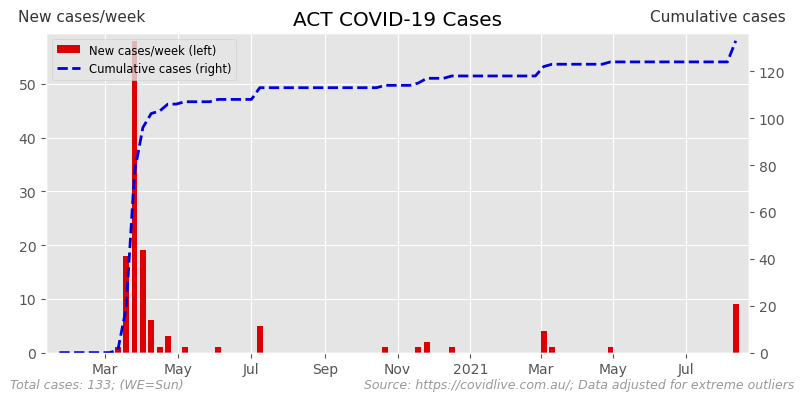

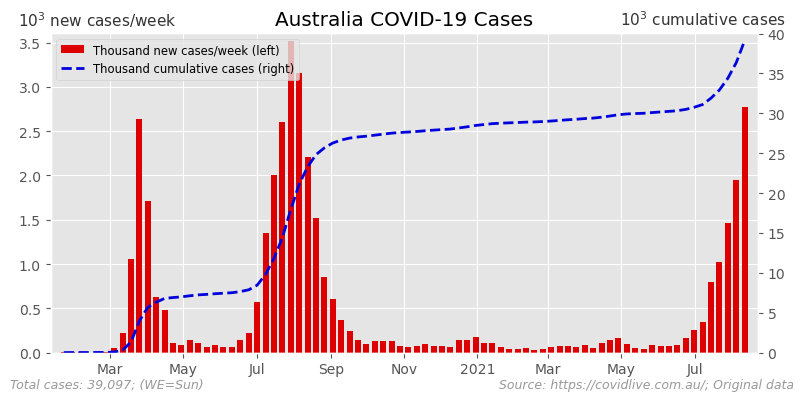

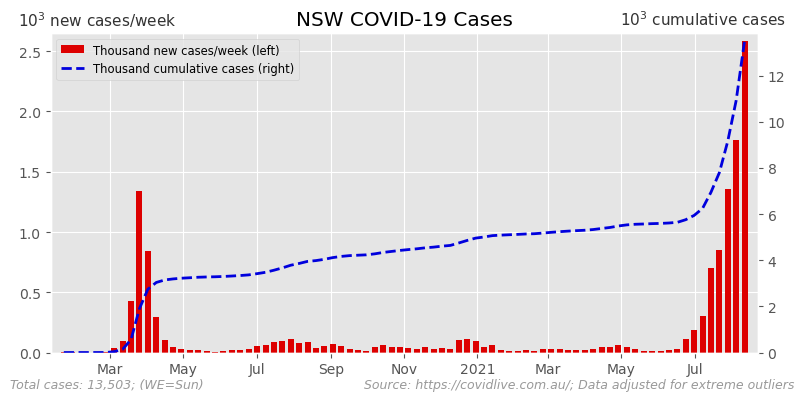

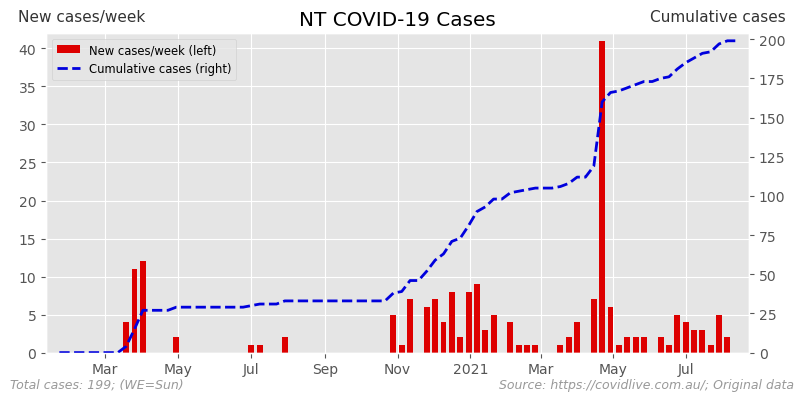

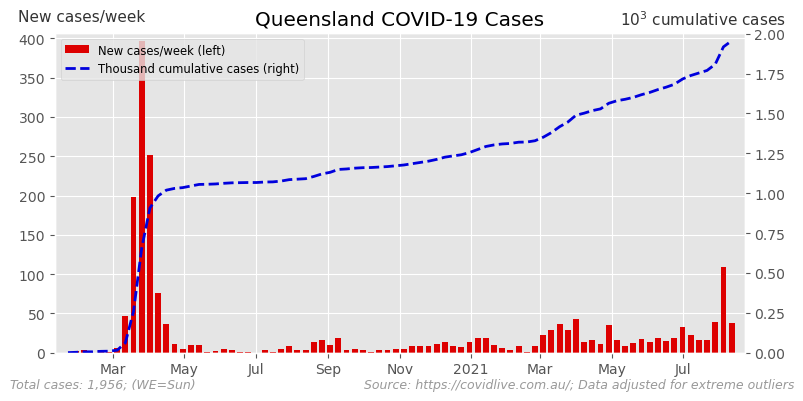

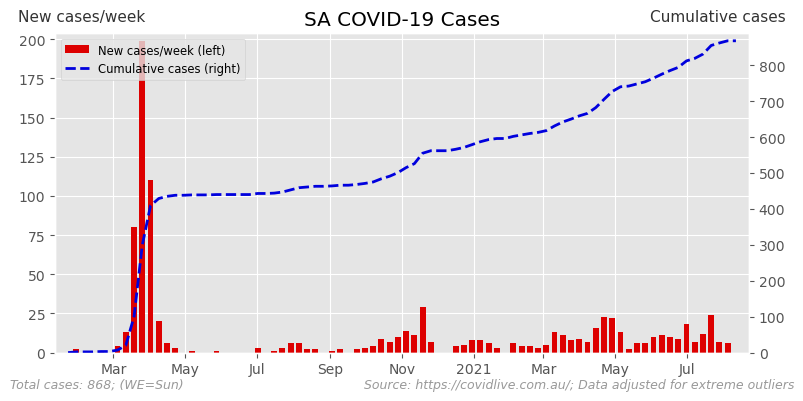

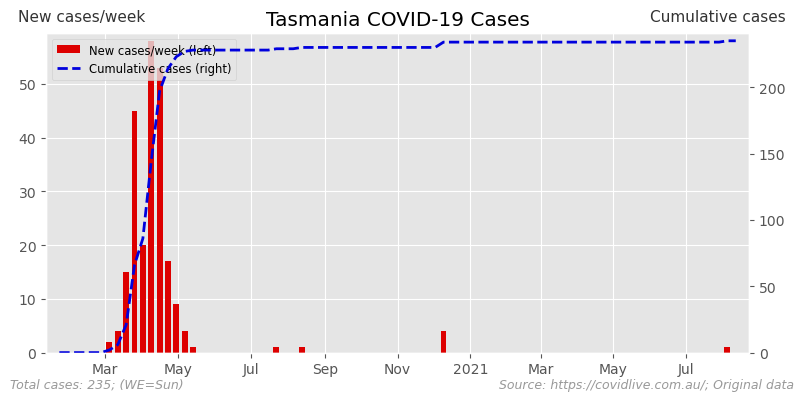

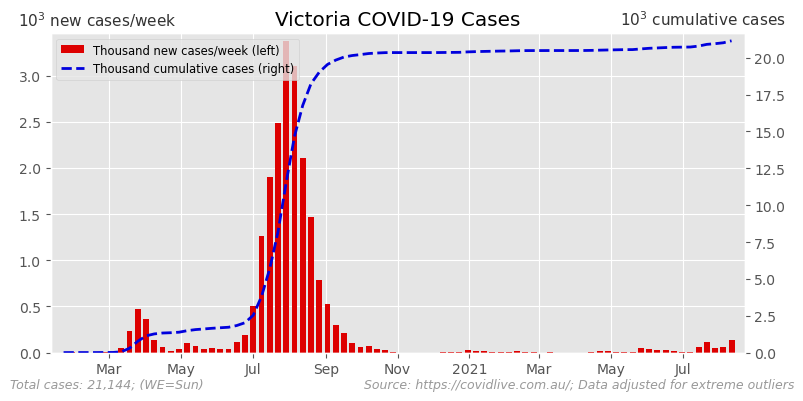

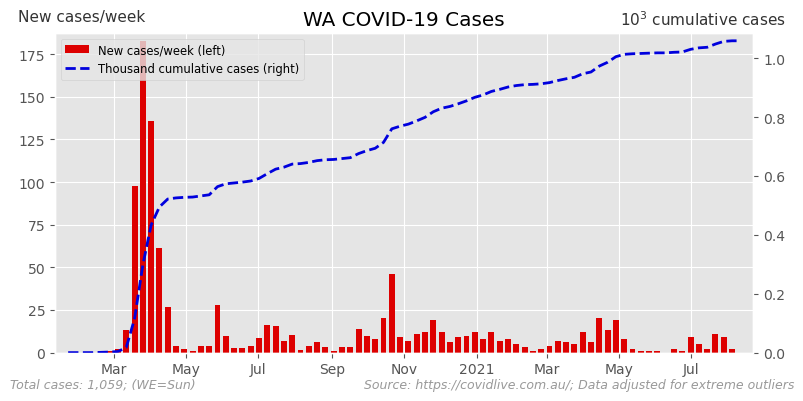

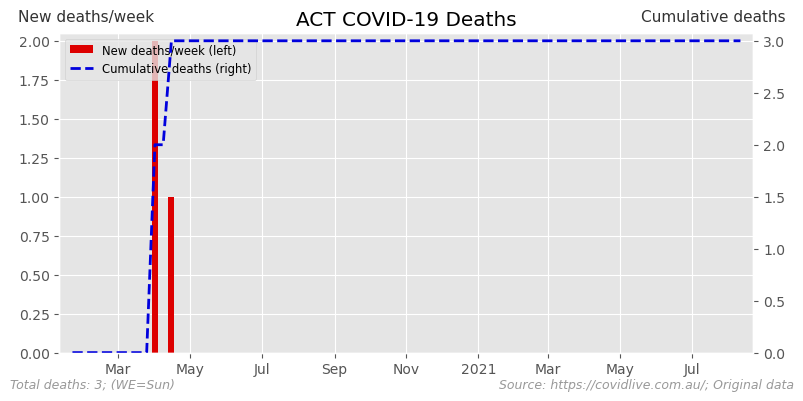

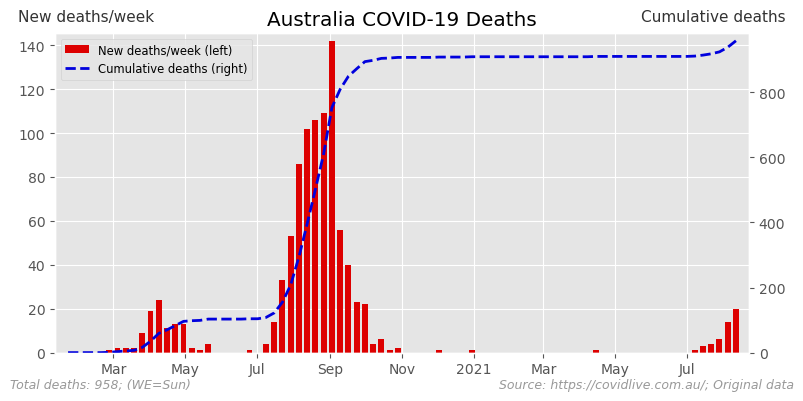

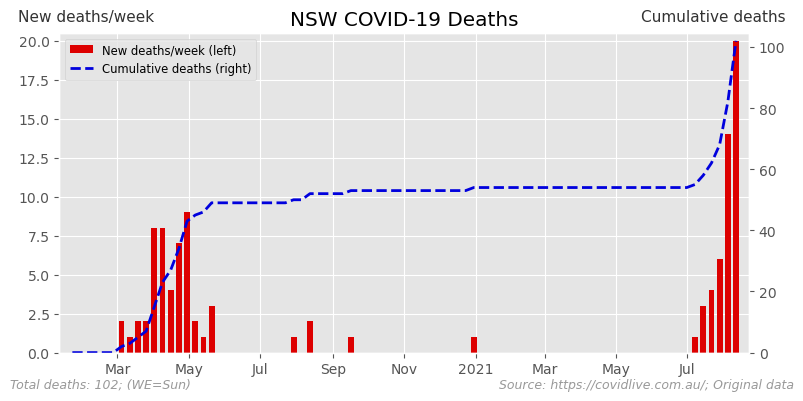

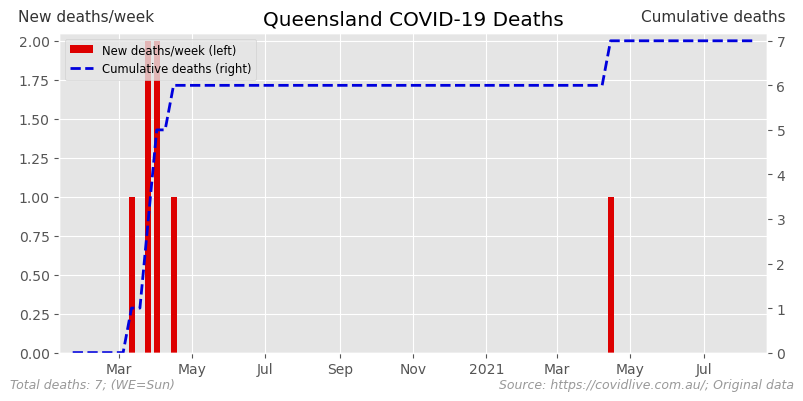

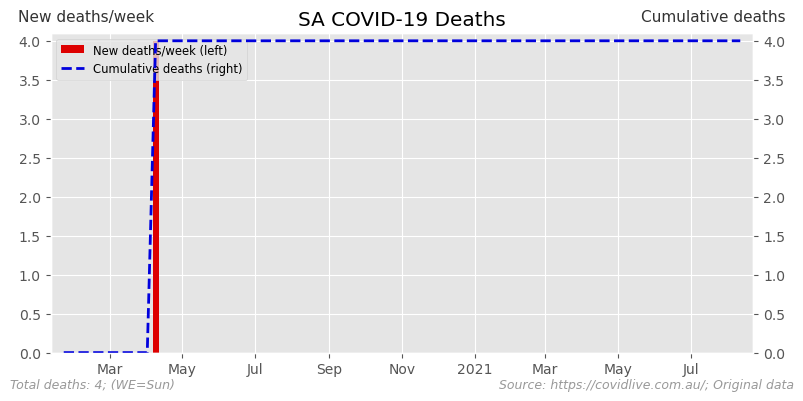

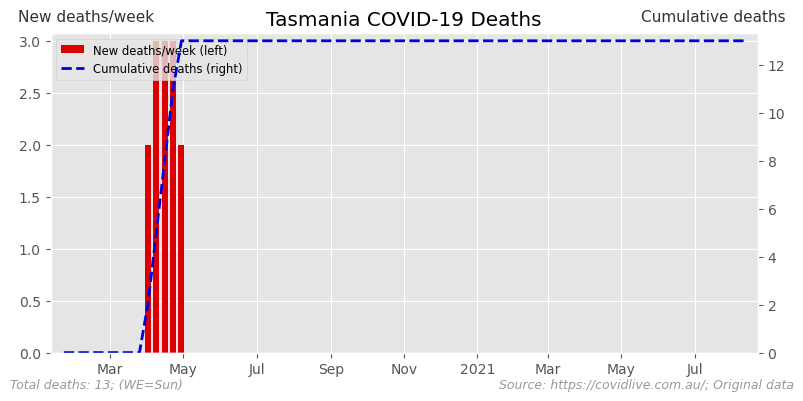

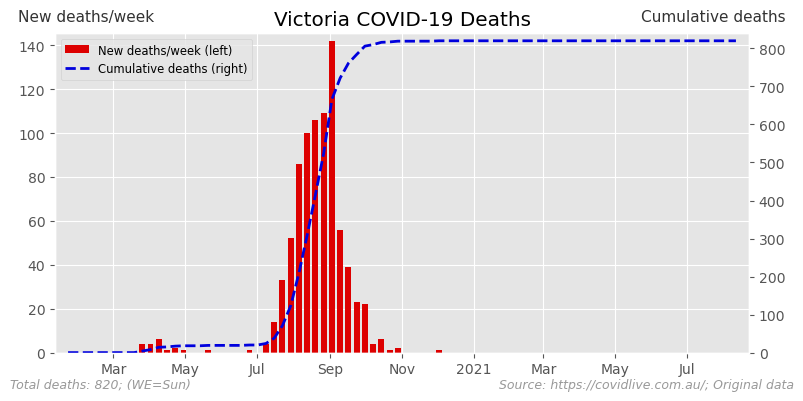

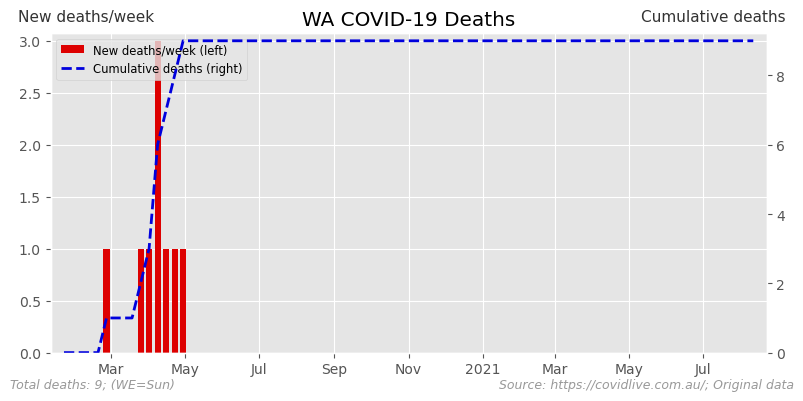

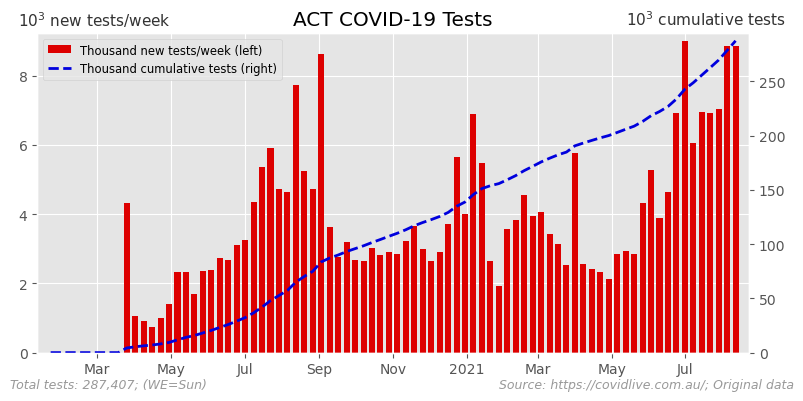

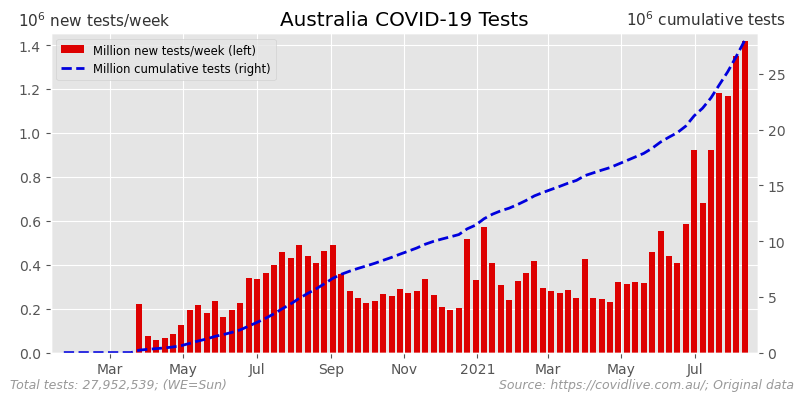

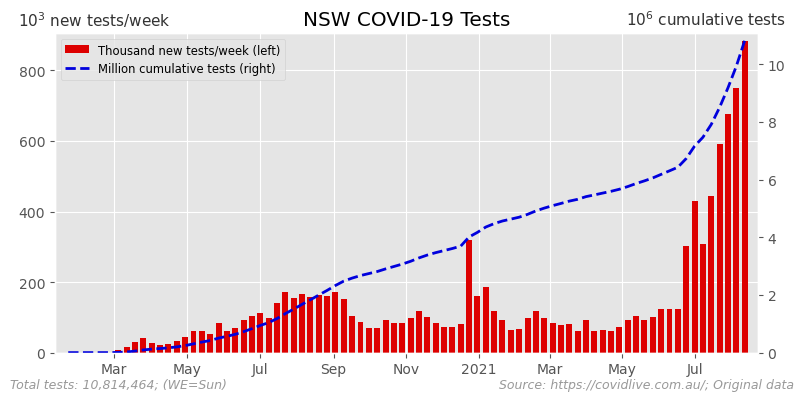

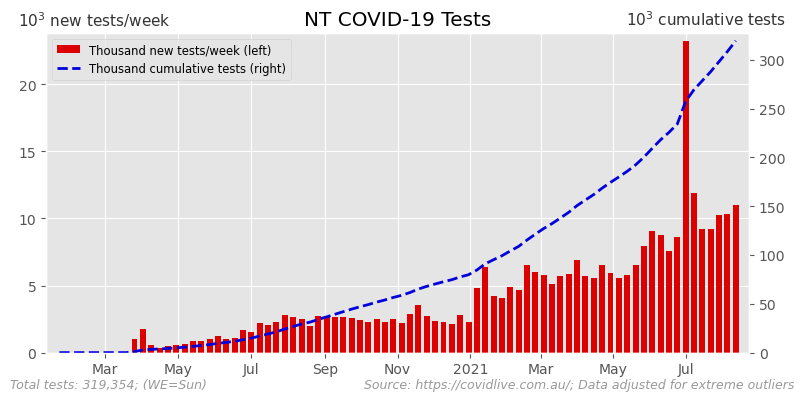

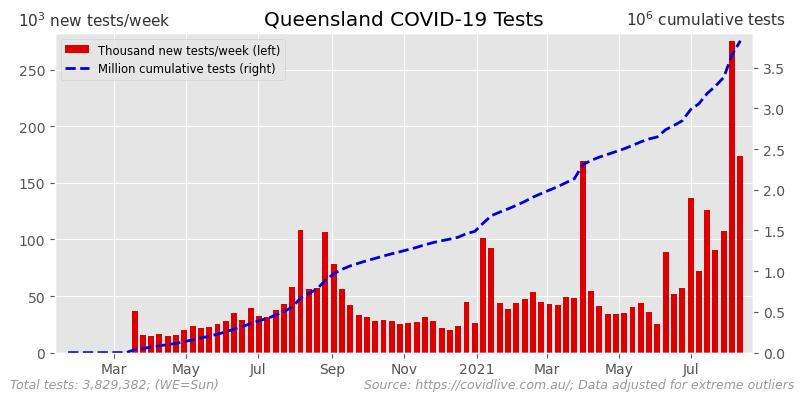

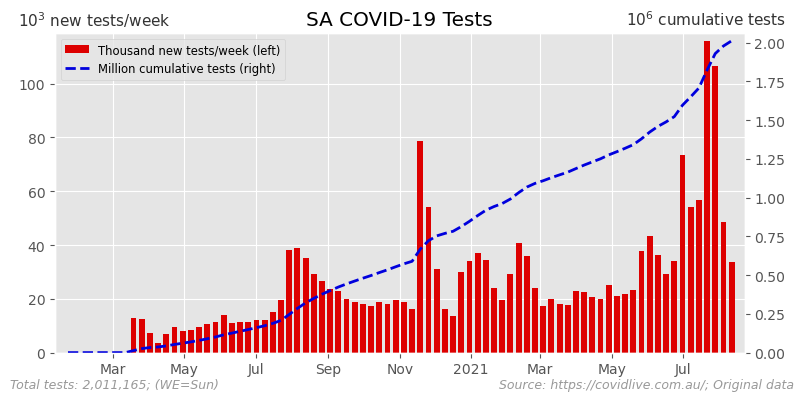

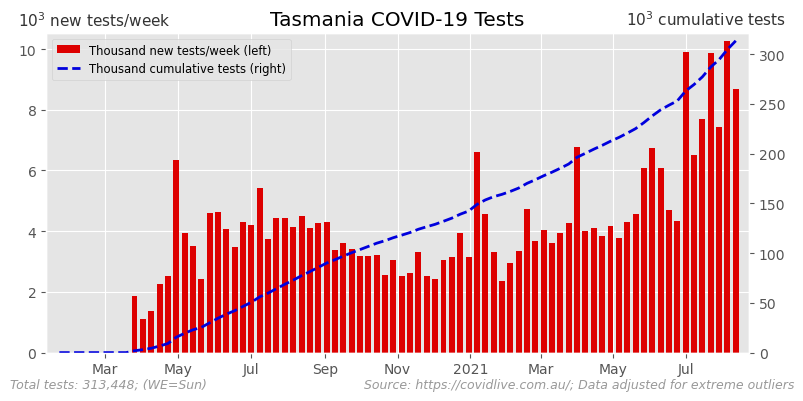

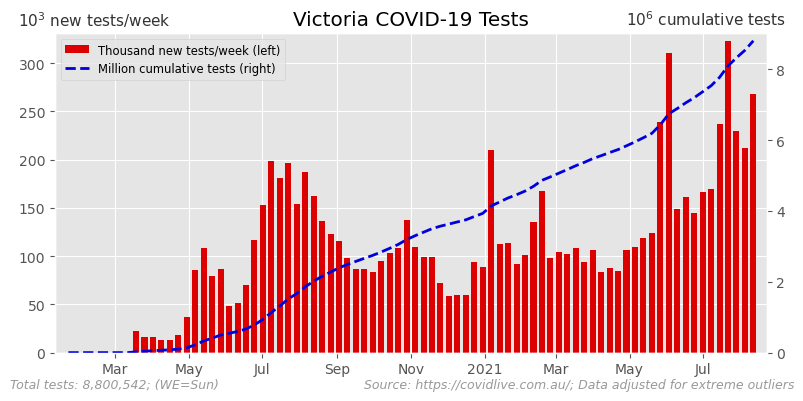

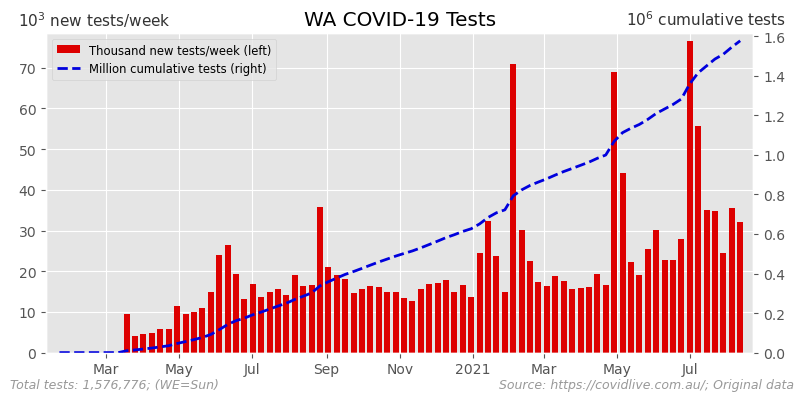

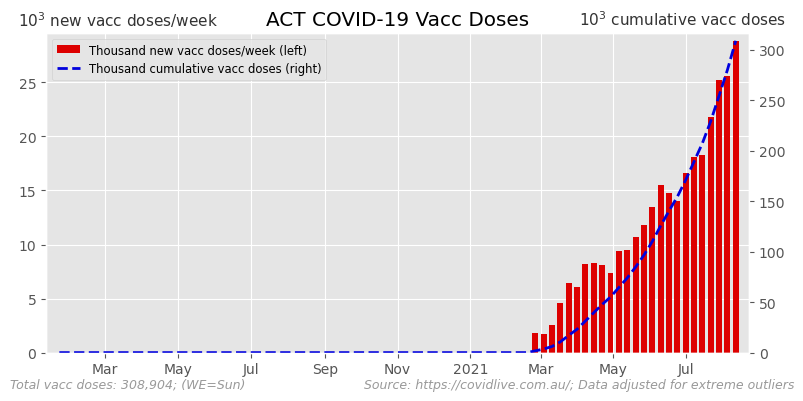

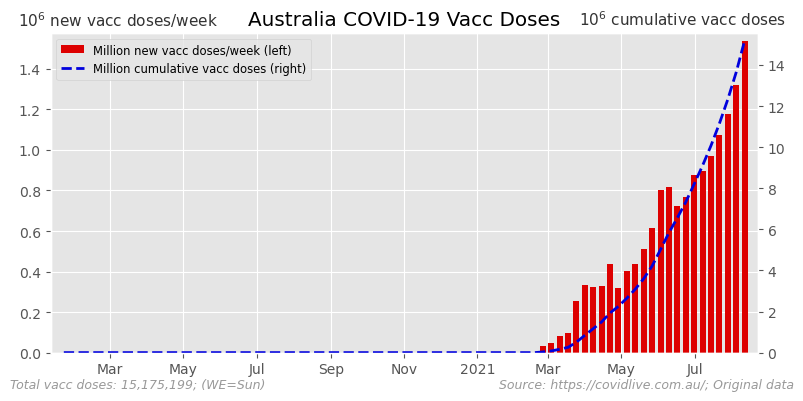

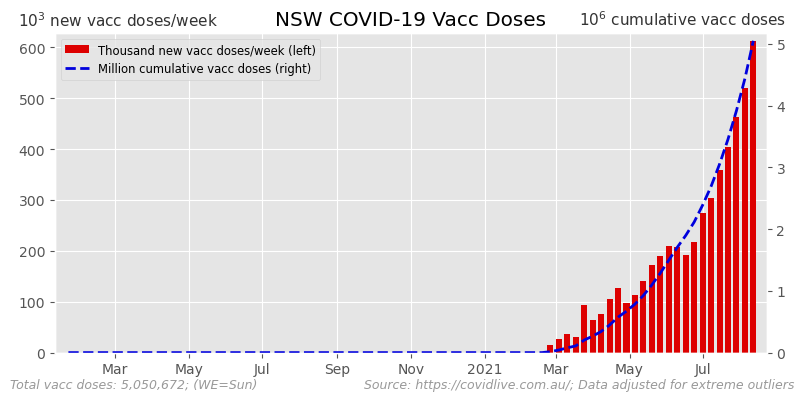

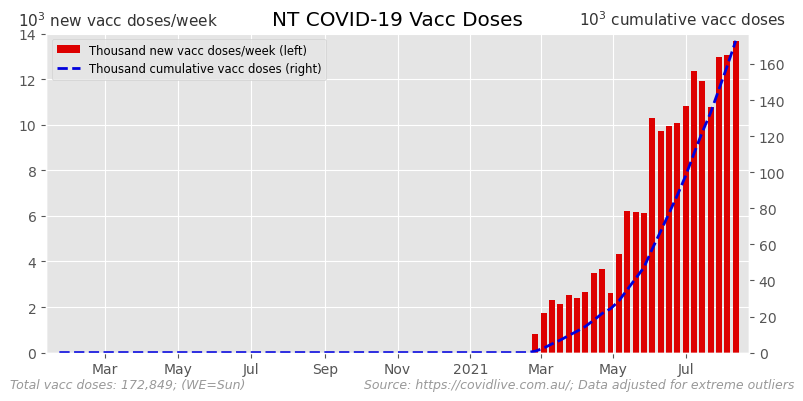

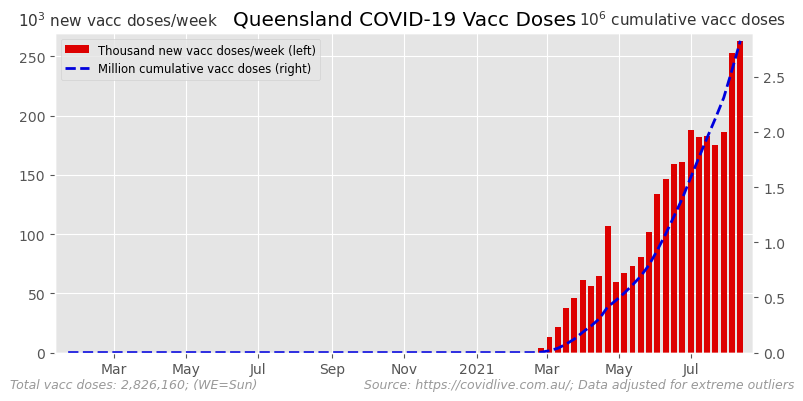

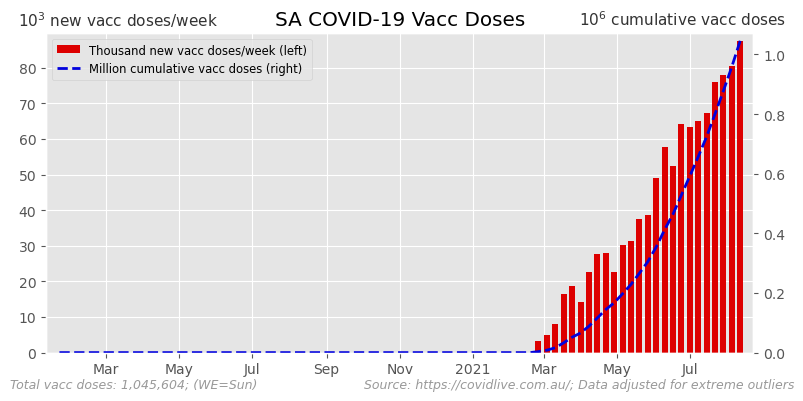

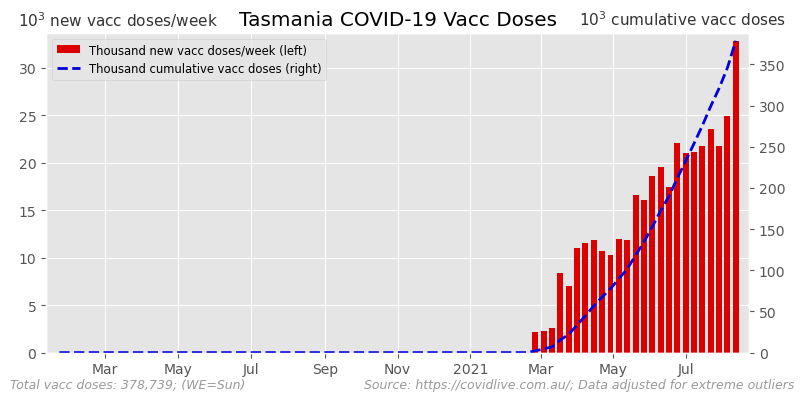

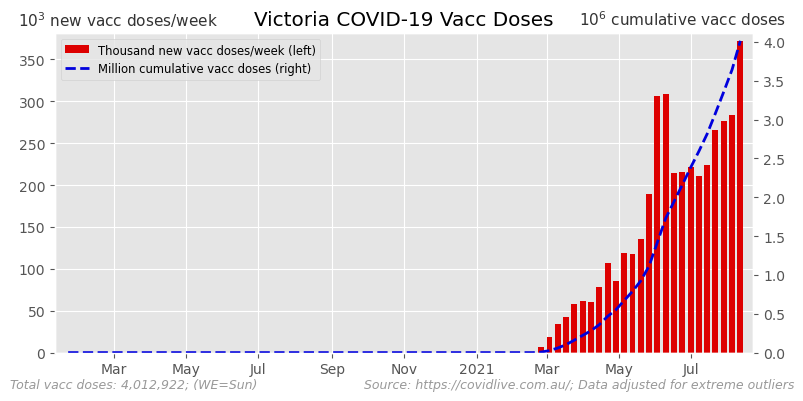

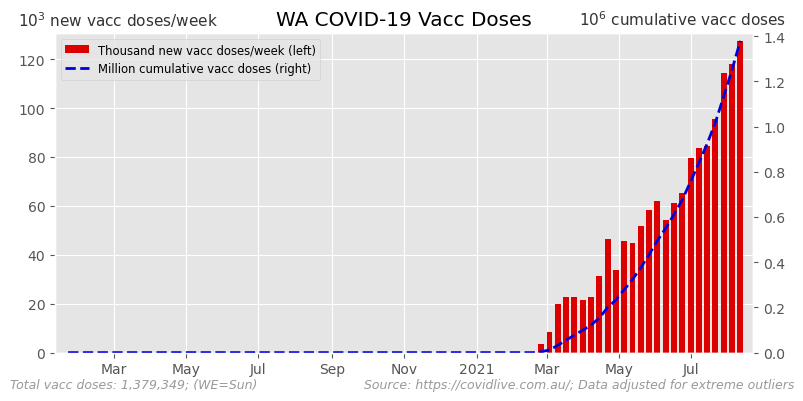

In [12]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    _ = ps.plot_weekly(
                       daily_c[item], desc, quality, 
                       chart_directory=CHART_DIRECTORY+'-!weekly-',
                       show=True,
                      )

## Bar Charts

In [13]:
def two_bar_plots(data_dict, item, prefix, desc):
    """latest cumulative and cumulative per population charts"""
    
    last_row = data_dict[item].iloc[-1].sort_values()
    #last_row = last_row[last_row > 0]
    if not len(last_row):
        # no data to plot
        return None
    date = data_dict[item].index[-1].ctime()[:10]
    
    for extra in '', f' per {power_text.lower()} population':
        ps.plot_barh(last_row, 
                     title=f'{prefix} COVID19 {desc}{extra}'.strip(),
                     save_as = f'{CHART_DIRECTORY}!bar-chart-{prefix}-{desc}-{extra}.png',
                     rfooter=SOURCE + ' ' + date,
                     show=True,
                    )
        
        # per capita second time round ...
        last_row = (last_row / state_pop).round(1).sort_values()

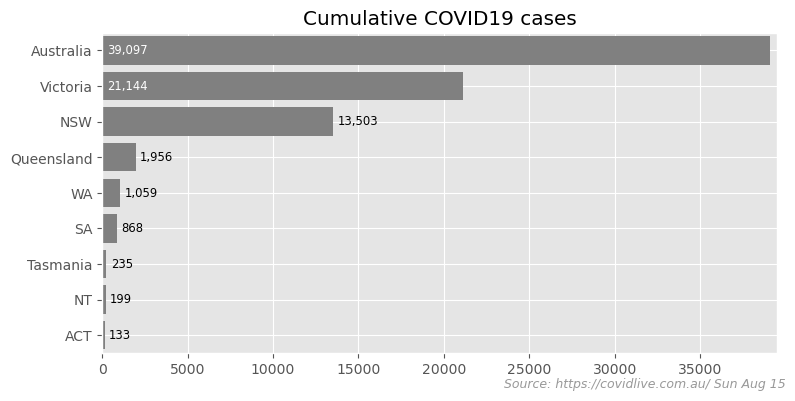

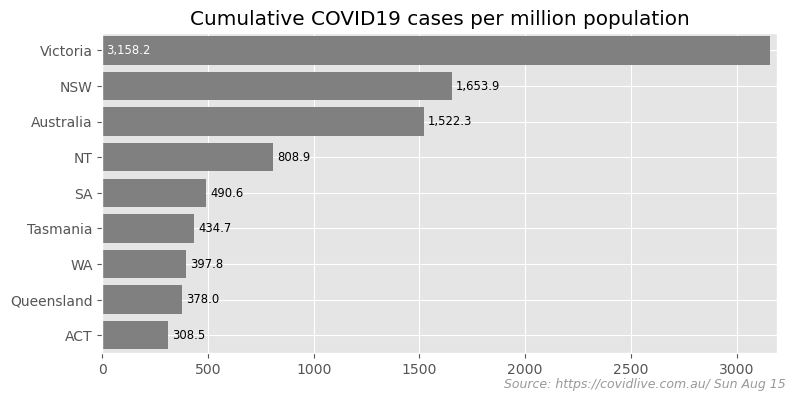

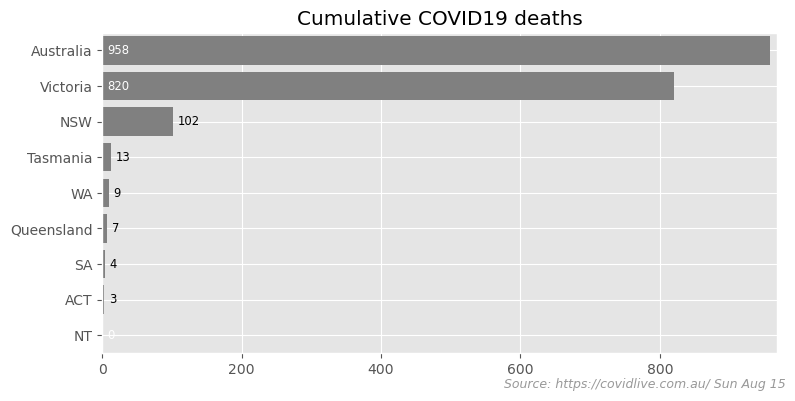

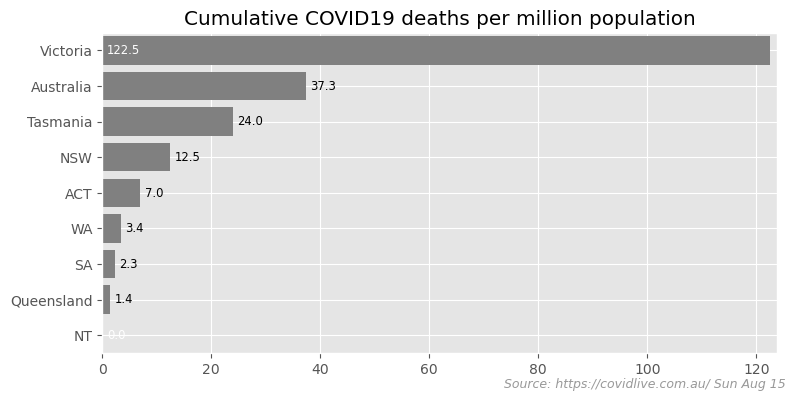

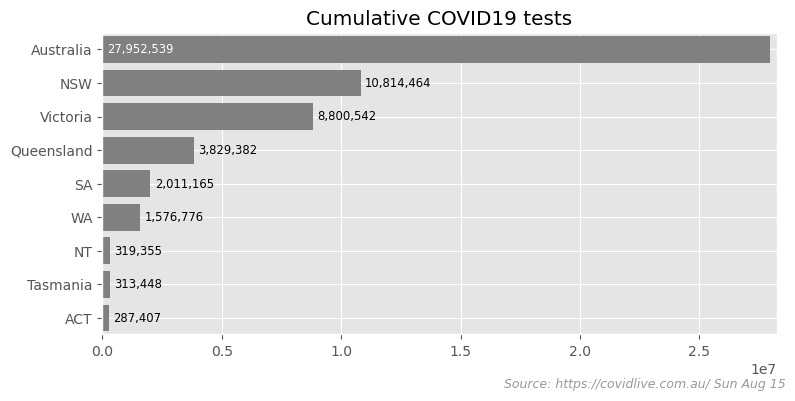

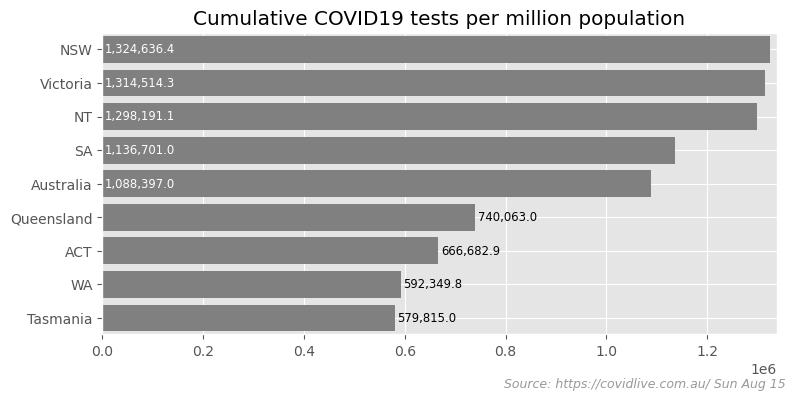

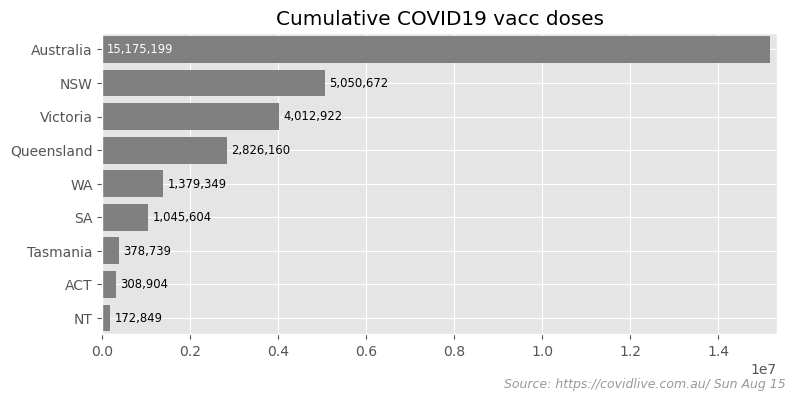

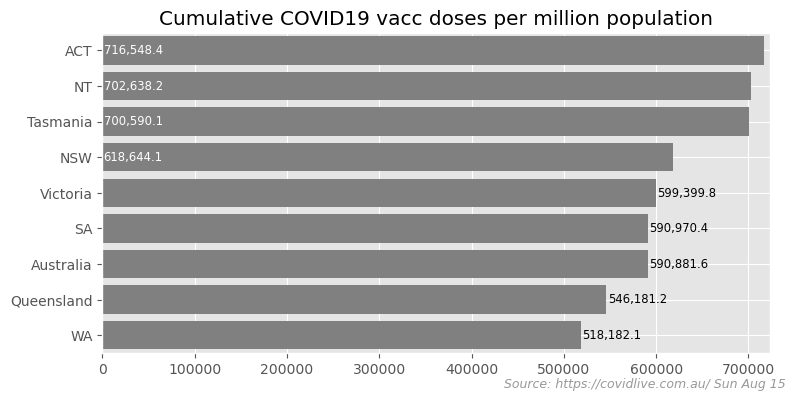

In [14]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [15]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [16]:
item = 'ACTIVE_CNT'
active_all = (
    get_pivot_table(frame_data, item)
    .dropna(axis=0, how='all')
    .fillna(0)
    .astype(int)
)

Lastest value less than its predecessor in ACTIVE_CNT for Queensland, SA


### Bar chart of active cases

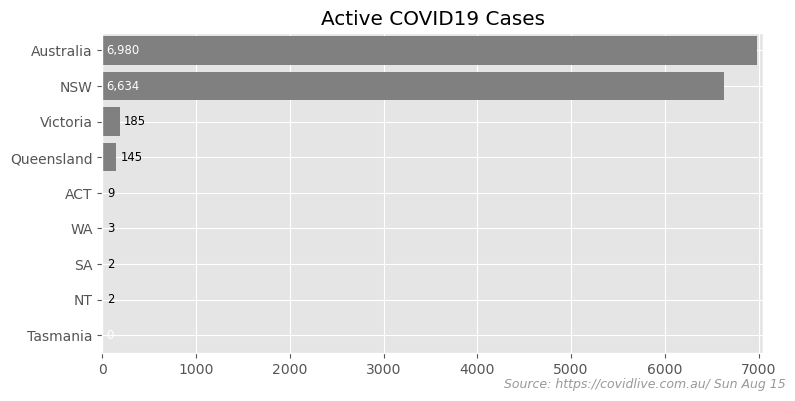

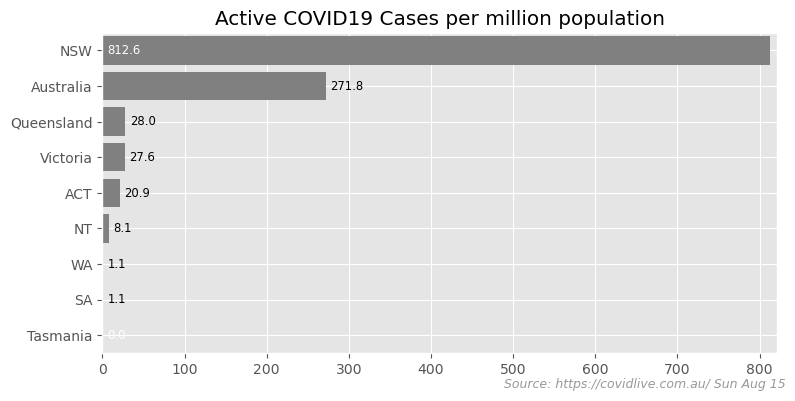

In [17]:
# bar chart of latest active cases
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

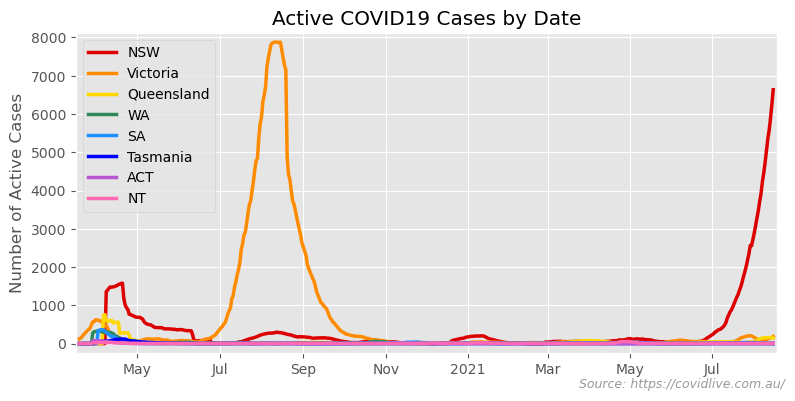

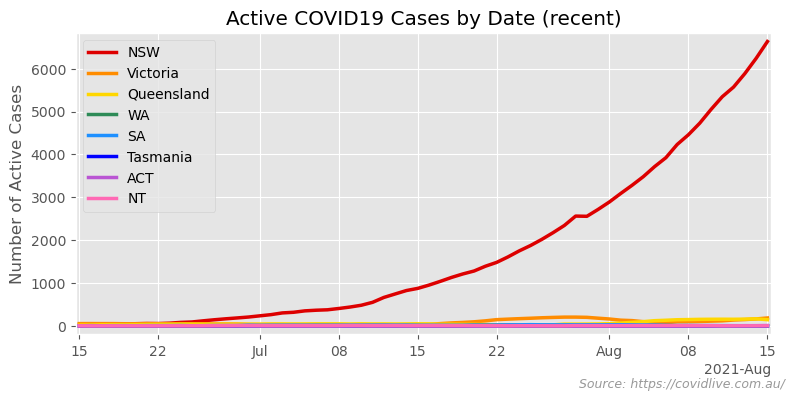

In [18]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
order = ['NSW', 'Victoria', 'Queensland', 
         'WA', 'SA', 'Tasmania', 'ACT', 'NT']
title = 'Active COVID19 Cases by Date'
MARGINS = (0.005, 0.03)
for recent in [0, RECENT]:
    data = active_all.iloc[-recent:]

    fig, ax = plt.subplots()
    ax.xaxis_date()
    for state in order:
        ax.plot(active_all.index[-recent:].values, 
            active_all[state].iloc[-recent:], 
            label=state, lw=2.5)
    ax.margins(*MARGINS)
    ax.legend(loc='upper left')
    title_extra = ''
    if recent > 0:
        title_extra = ' (recent)'
    
    ps.finalise_plot(ax, title=title+title_extra, 
                     xlabel=None,
                     chart_directory=CHART_DIRECTORY,
                     ylabel='Number of Active Cases',
                     rfooter=SOURCE,
                     show=True,
                    )

## Source of infection

In [19]:
def get_dataset_for_state(raw_data: pd.DataFrame, 
                          columns: List[str], 
                          state: str) -> pd.DataFrame:
    
    # Add in date colums
    sources = columns + ['REPORT_DATE']
    
    # copy rows for relevant state, in respect of the sources columns. 
    df = (
        raw_data[raw_data.NAME == state]
        [sources]
        .copy()
        .set_index('REPORT_DATE')
        .sort_index(ascending=True)
    )

    # check for missing data and warn
    problematic = df.iloc[-1].isna()
    if problematic.any(): # remove last row if partially complete
        warn(f'Missing latest {state} data for '
             f'{", ".join(problematic[problematic].index.to_list())}')
        df.drop(df.tail(1).index, inplace=True)
        
    # check coherence of cumulative data
    summe = df.iloc[-1] < df.iloc[-2]
    if summe.any():
        warn(f'Check {state} where latest less then pred: '
             f'{", ".join(summe[summe].index)}')
        
    df = df.dropna(axis=0, how='all') # remove all empty rows

    return df

In [20]:
# build a dictionary of dataframes for infection source data
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((frame_data.columns.str[:3] == 'SRC').sum() == len(names))

state_SOI_data = {}
for state in frame_data.NAME.unique():
    state_SOI_data[state]  = (
        get_dataset_for_state(frame_data, list(names.keys()), state)
        .rename(columns=names)
    )

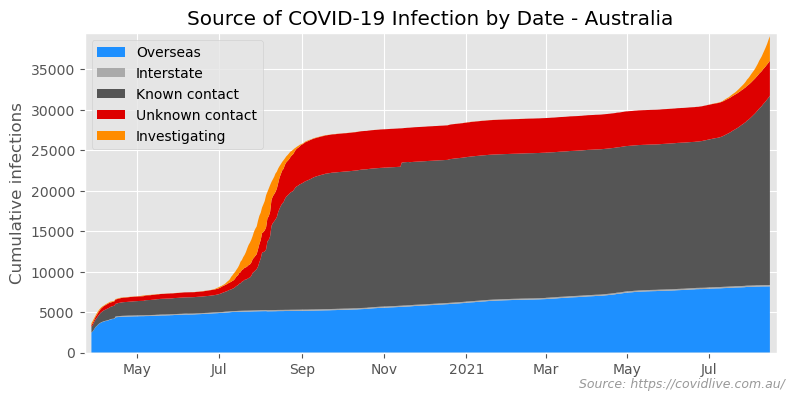

In [21]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
national_soi = state_SOI_data['Australia']

labels = list(names.values())
args = [national_soi[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(national_soi.index, *args, labels=labels)
ax.legend(loc='upper left')
ax.margins(0.01)

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel=None, ylabel='Cumulative infections',
                 rfooter=SOURCE,
                 show=True,
                )

In [22]:
# extract the latest data, and under investigation
states = list(frame_data.NAME.unique())
states.remove('Australia')
latest = pd.DataFrame()
investigating = pd.DataFrame()
for state in states:
    df = state_SOI_data[state].sort_index()
    df = df.dropna(axis=0, how='all')
    investigating[state] = df['Investigating']
    latest[state] = df.iloc[-1]
    if latest[state].isna().any():
        warn(f'Warning: data not current for {state}')
        print(latest[state][latest[state].isna()])
        latest[state] = df.iloc[-2]
        
latest

NSW  Victoria  Queensland     WA     SA  Tasmania   ACT  \
Overseas         3572.0    1215.0      1437.0  944.0  653.0      85.0  95.0   
Interstate         91.0       0.0        27.0    8.0   28.0       4.0   8.0   
Known contact    6348.0   16148.0       447.0   93.0  178.0     141.0  27.0   
Unknown contact   483.0    3770.0        45.0   14.0    9.0       5.0   1.0   
Investigating    3009.0      11.0         0.0    0.0    0.0       0.0   2.0   

                    NT  
Overseas         185.0  
Interstate         2.0  
Known contact     12.0  
Unknown contact    0.0  
Investigating      0.0

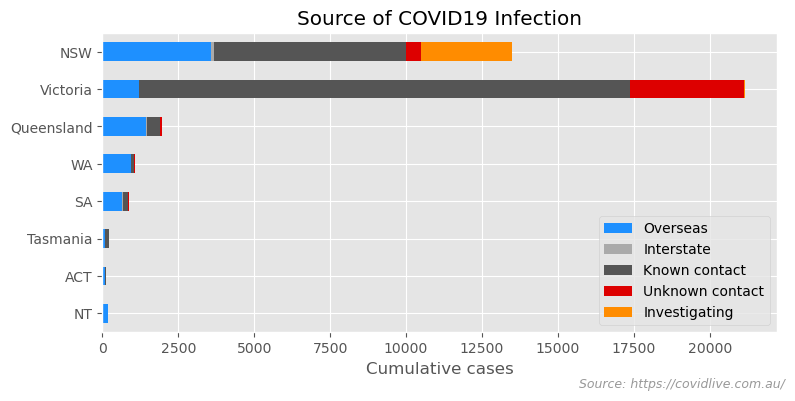

In [23]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel='Cumulative cases', ylabel=None,
                 rfooter=SOURCE,
                 show=True,
                )

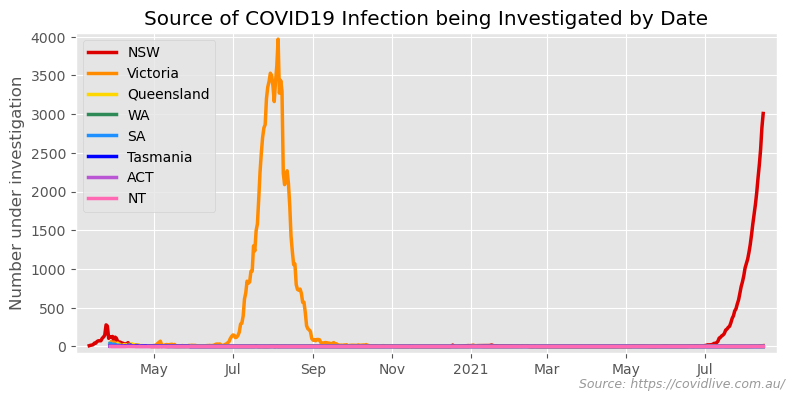

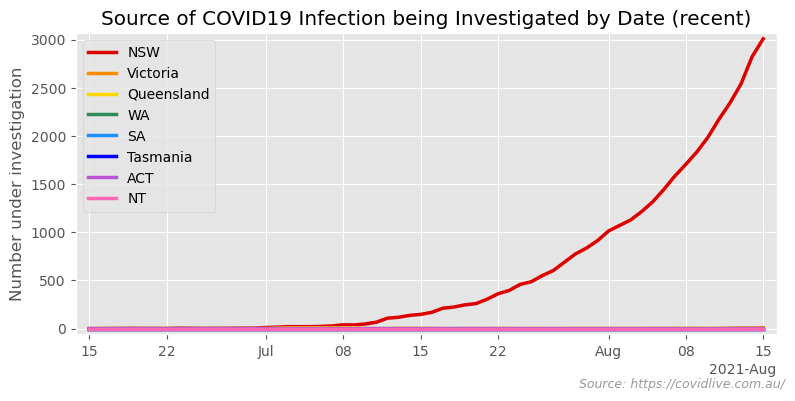

In [24]:
# plot under investigation
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
for recent in [0, RECENT]:
    fig, ax = plt.subplots()
    ax.margins(0.02)
    for state in investigating.columns:
        ax.plot(investigating.index[-recent:],
                investigating[state].iloc[-recent:],
                lw=2.5, label=state)
    ax.legend(loc='best')
    title = 'Source of COVID19 Infection being Investigated by Date'
    plus = ''
    if recent > 0:
        plus = ' (recent)'

    ps.finalise_plot(ax, 
                     title=title+plus, 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None, ylabel='Number under investigation',
                     rfooter=SOURCE,
                     show=True,
                    )

## Local cases - speculative 
Note: calculated using the source of infection data

### Create dataframe of local tranmission

In [25]:
# definition of local (Australian) transmission
local_trans = list(names.values())
local_trans.remove('Overseas')
print('Local Transmission:', local_trans)

# calculate from from Sourse of Infection data collected above
local_trans_df = pd.DataFrame()
for state in state_SOI_data:
    local_trans_df[state] = state_SOI_data[state][local_trans].sum(axis=1)

if local_trans_df.iloc[-1].isna().any():
    warn('There are NaNs in the last row of the local transmission data')
    
# Let's look at it ...
local_trans_df.tail()

Local Transmission: ['Interstate', 'Known contact', 'Unknown contact', 'Investigating']


Australia     NSW  Victoria  Queensland     WA     SA  Tasmania  \
REPORT_DATE                                                                    
2021-08-11     29195.0  8335.0   19841.0       496.0  115.0  215.0     150.0   
2021-08-12     29575.0  8677.0   19868.0       506.0  115.0  215.0     150.0   
2021-08-13     29984.0  9060.0   19883.0       513.0  115.0  215.0     150.0   
2021-08-14     30474.0  9522.0   19904.0       519.0  115.0  215.0     150.0   
2021-08-15     30911.0  9931.0   19929.0       519.0  115.0  215.0     150.0   

              ACT    NT  
REPORT_DATE              
2021-08-11   29.0  14.0  
2021-08-12   30.0  14.0  
2021-08-13   34.0  14.0  
2021-08-14   35.0  14.0  
2021-08-15   38.0  14.0

In [26]:
local_trans_df.diff().tail()

Australia    NSW  Victoria  Queensland   WA   SA  Tasmania  ACT  \
REPORT_DATE                                                                    
2021-08-11       364.0  345.0      16.0         3.0  0.0  0.0       0.0  0.0   
2021-08-12       380.0  342.0      27.0        10.0  0.0  0.0       0.0  1.0   
2021-08-13       409.0  383.0      15.0         7.0  0.0  0.0       0.0  4.0   
2021-08-14       490.0  462.0      21.0         6.0  0.0  0.0       0.0  1.0   
2021-08-15       437.0  409.0      25.0         0.0  0.0  0.0       0.0  3.0   

              NT  
REPORT_DATE       
2021-08-11   0.0  
2021-08-12   0.0  
2021-08-13   0.0  
2021-08-14   0.0  
2021-08-15   0.0

In [27]:
# make the usual adjustments
LOCAL = 'LOCAL_TRANS'

# the next step assumes the data for today is fully updated.
# but if not, we roll forward yesterday's numbers so that
# the cumulative bar charts (below) are complete.
cum_u[LOCAL] = (
    local_trans_df
    .sort_index(ascending=True)
    .replace({0: np.nan})
    .ffill()
    .fillna(0)
    .astype(int)
)

daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

### Bar charts cumulative local transmission

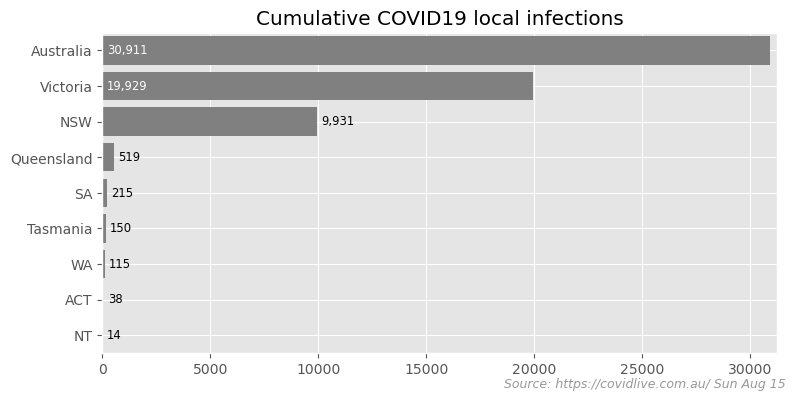

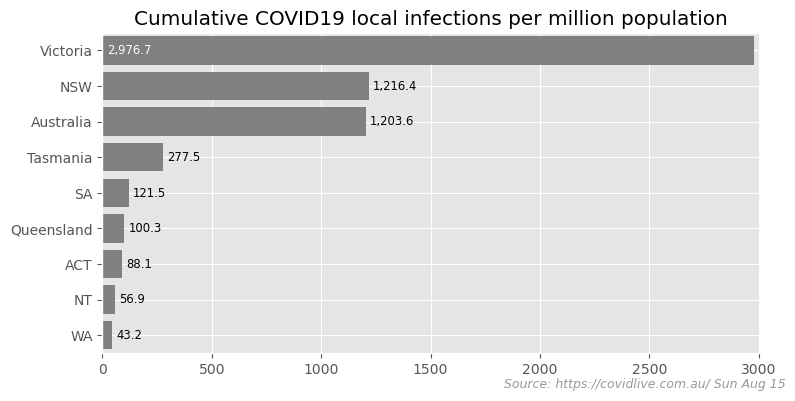

In [28]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

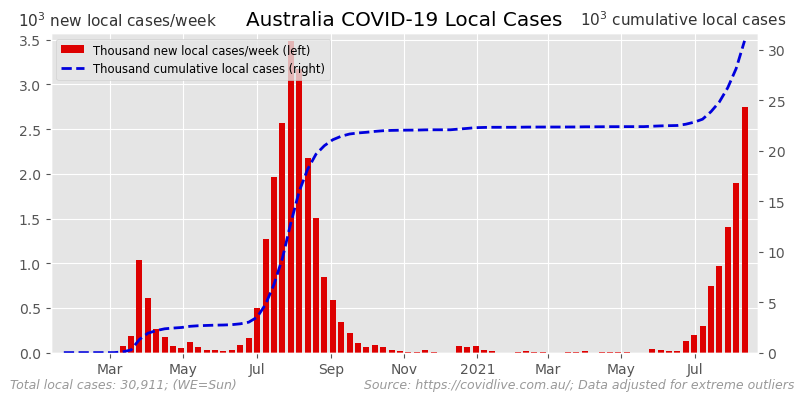

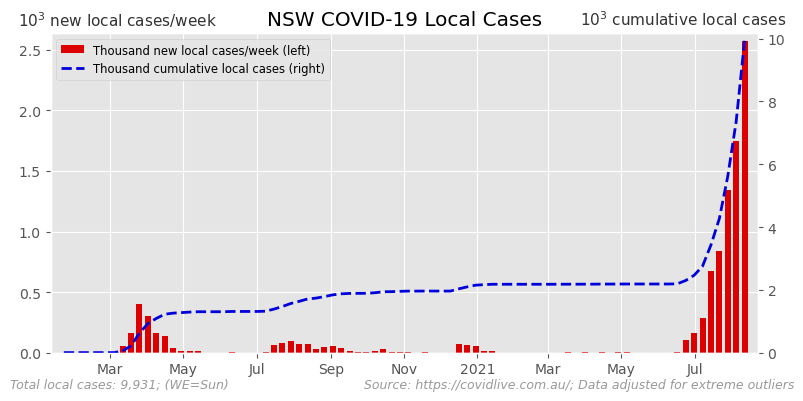

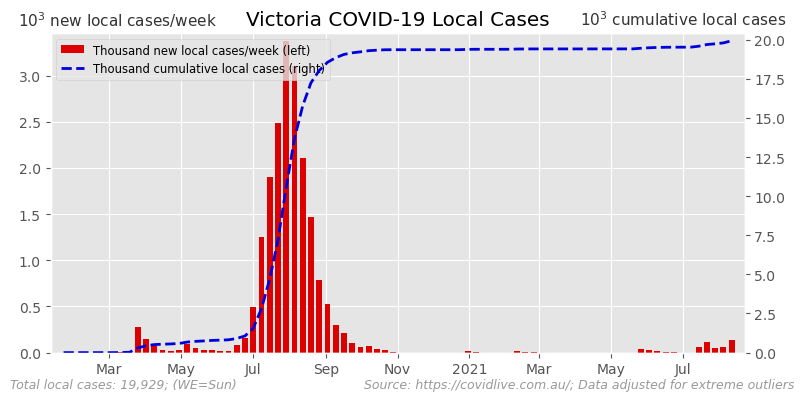

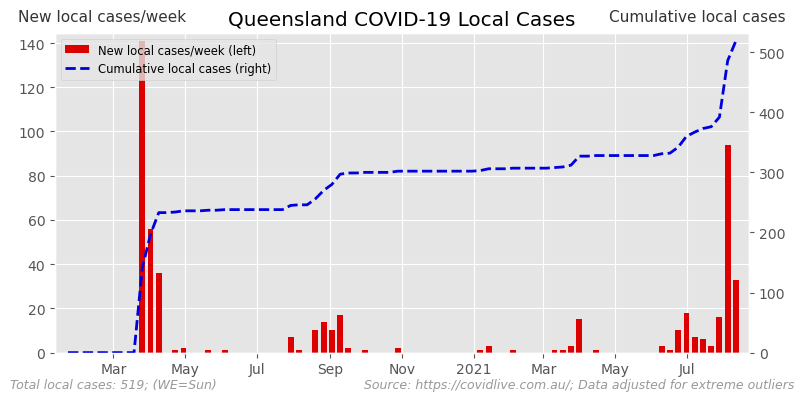

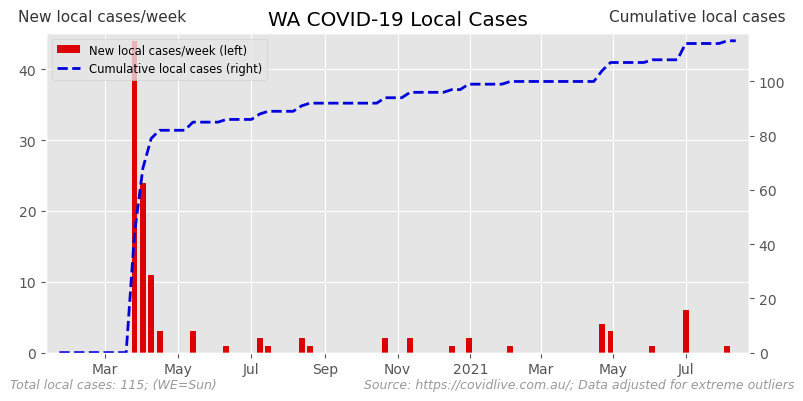

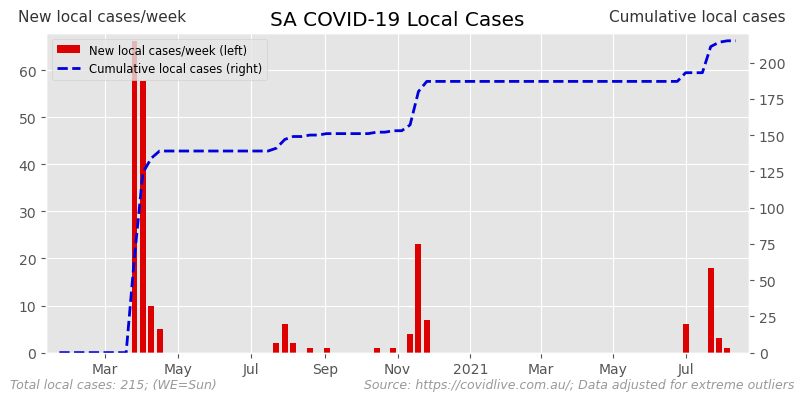

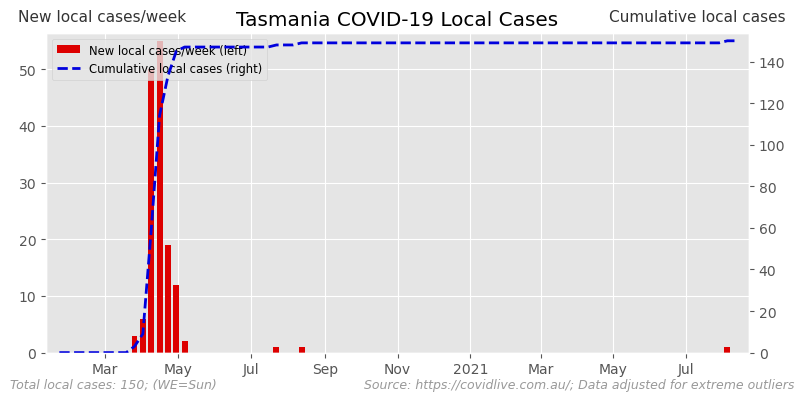

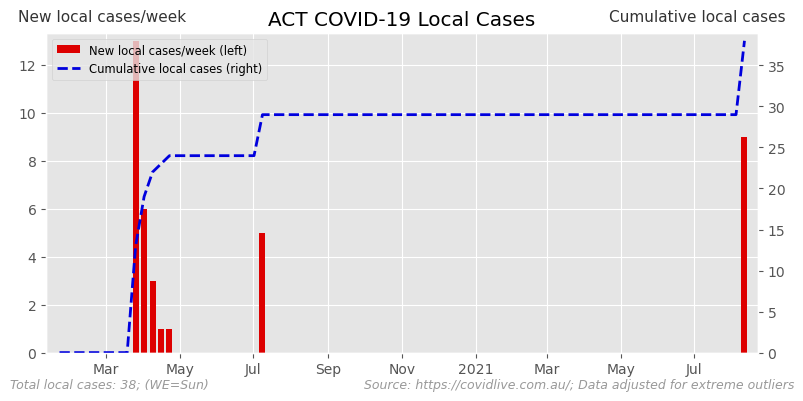

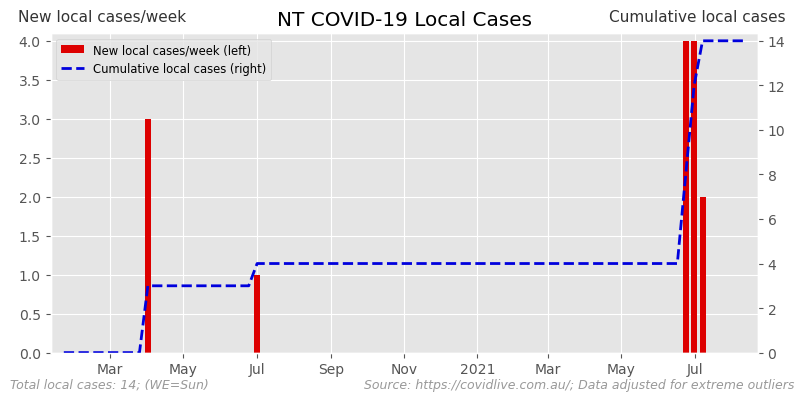

In [29]:
quality = pd.Series(dtype=str)
for state in daily_u[LOCAL].columns:
    if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
_ = ps.plot_weekly(
    daily_c[LOCAL], desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [30]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        MARGINS = 0.015
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(MARGINS) # seems to work here
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange')
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue')
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=f"{CHART_DIRECTORY}-recent-local-",
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         rfooter=SOURCE,
                         show=True,
                        )

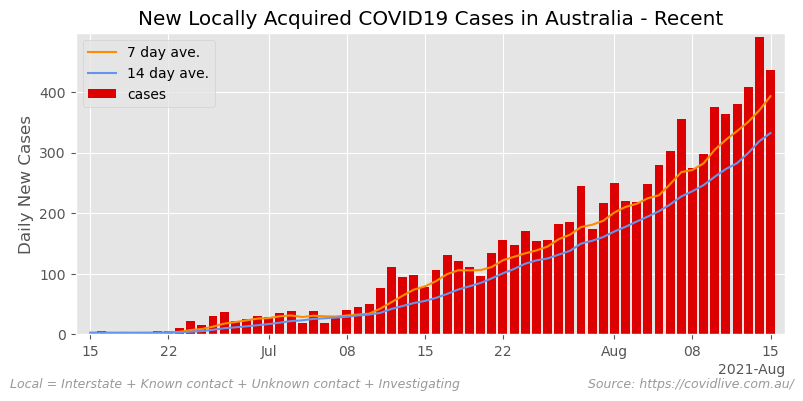

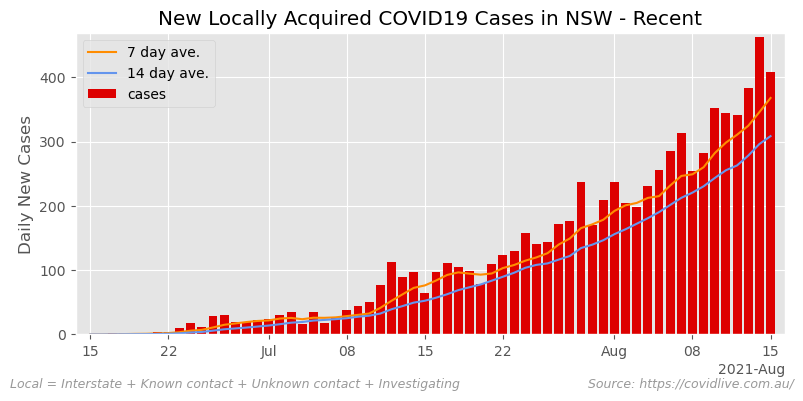

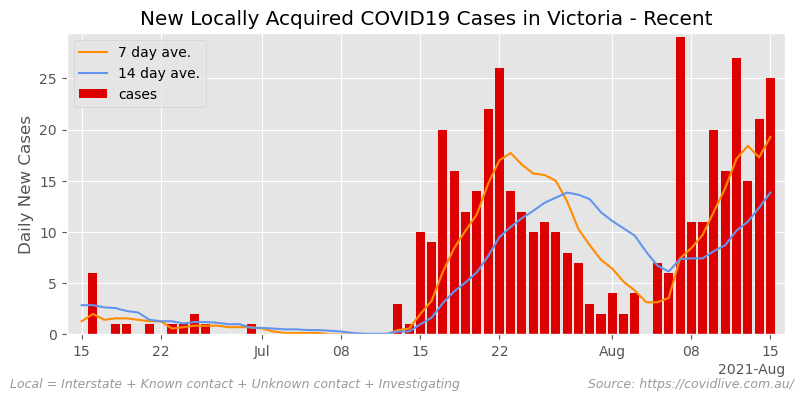

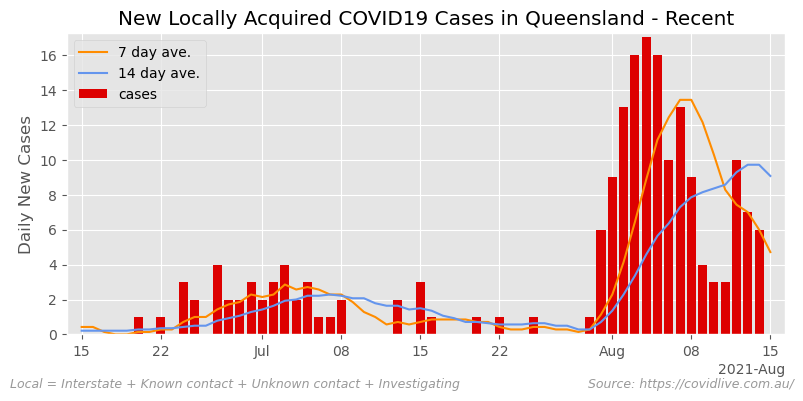

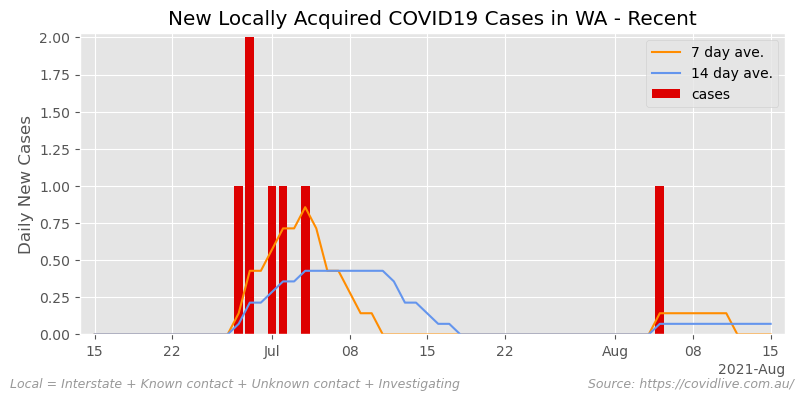

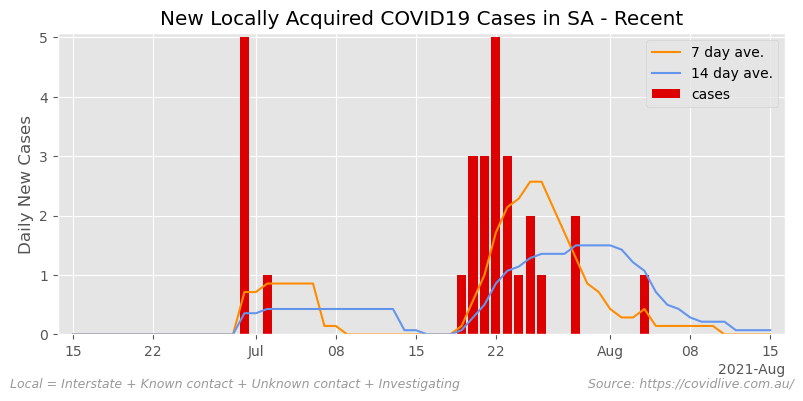

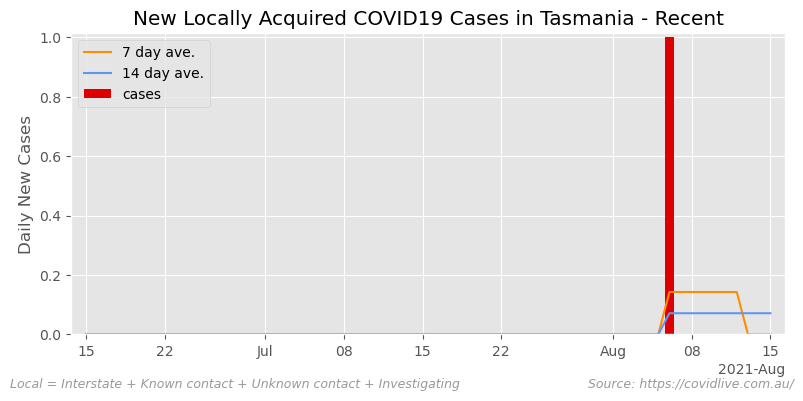

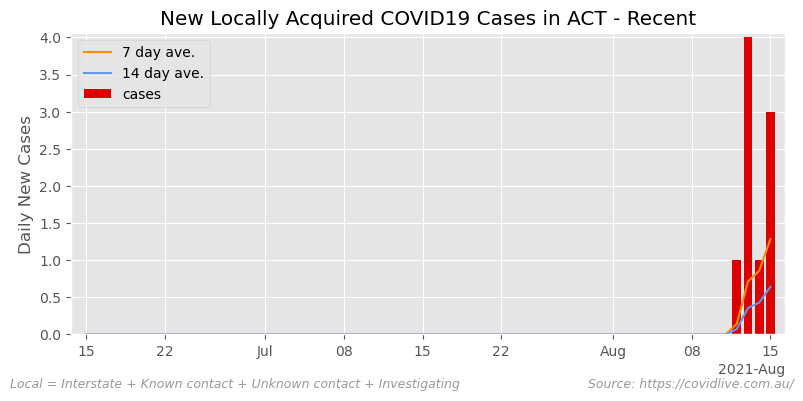

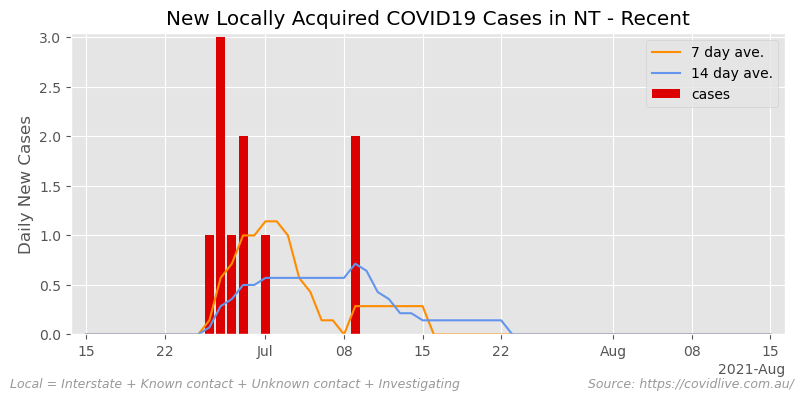

In [31]:
# and plot it
recent_bar_with_ma_plot(daily_c[LOCAL], "cases")

### Current outbreaks

Note: requires the data for today to be updated.

In [32]:
def select(state, start_date, span_days=100):
    series = daily_c[LOCAL][state]
    return (
        series[series.index >= pd.Timestamp(start_date)]
        .iloc[:span_days]
        .reset_index(drop=True)
    )


def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    for label, (state, start_date, reduced_span) in outbreaks.items():
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = select(state, start_date, span_days=span)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax)
                ax.legend(ncol=2, prop={'size': 8})

        # smaller margins
        MARGINS = 0.025
        ax.margins(MARGINS)
                
        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            
        ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=ylabel.split()[0],
            lfooter='Day zero is the last zero new cases day before new cases',
            rfooter=SOURCE,
            show=True,
            **kwargs, 
        )
        

colours = ['darkorange', '#555555', '#dd0000', 
           'royalblue', 'deepskyblue', 'orchid', 'darkred']

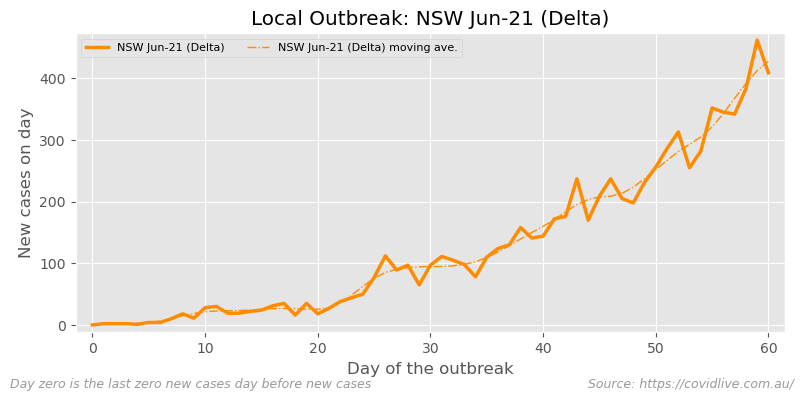

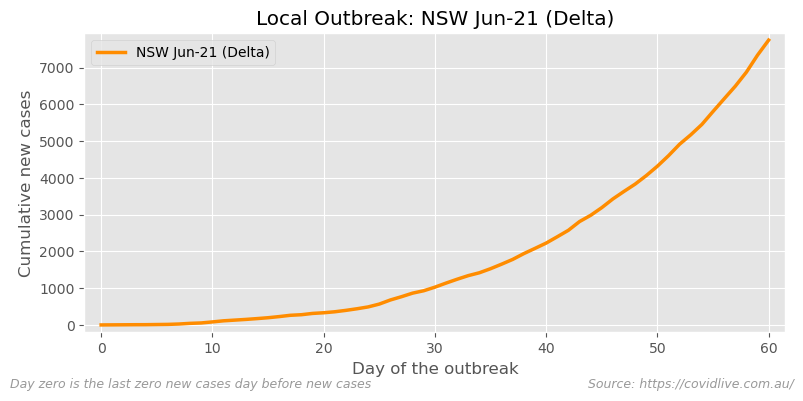

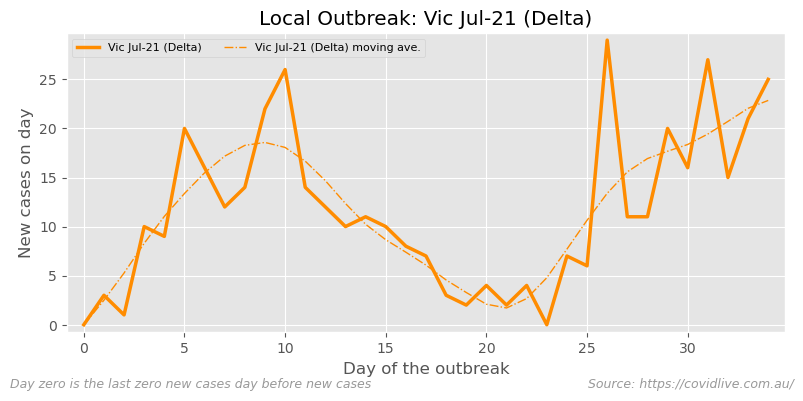

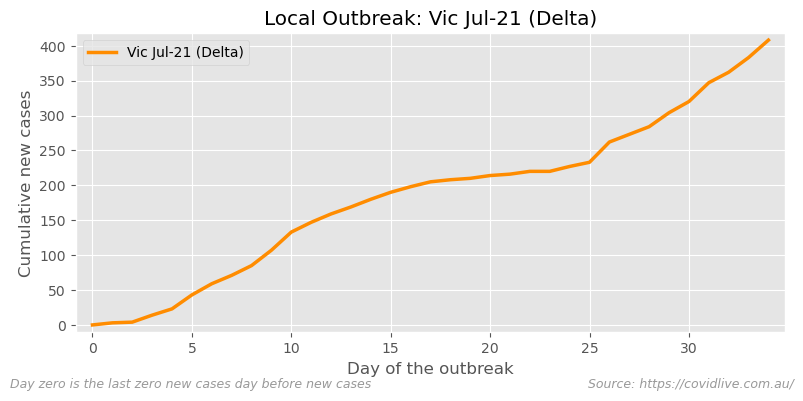

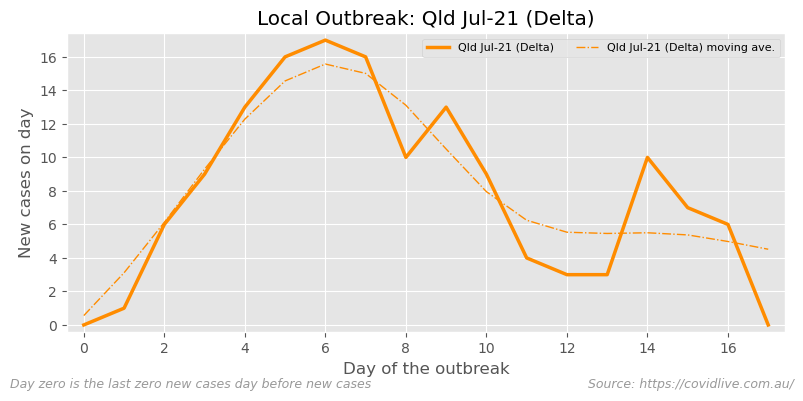

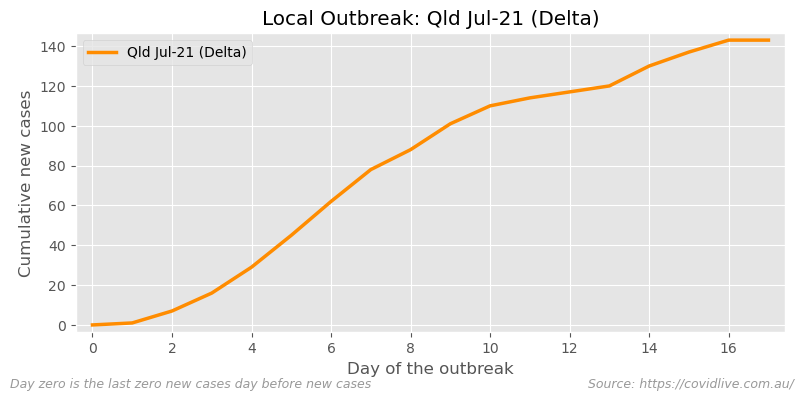

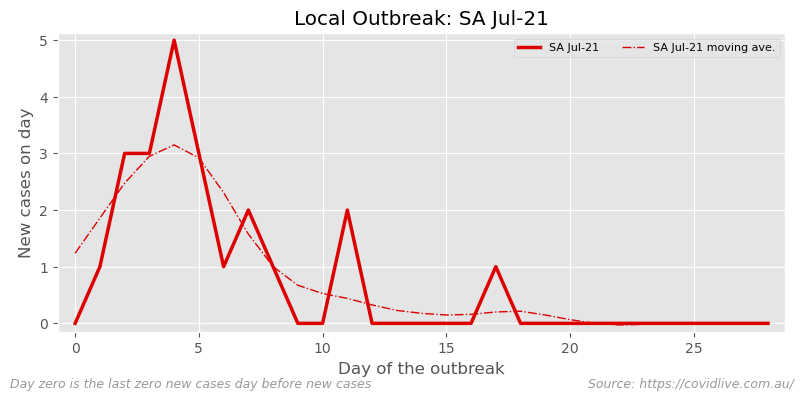

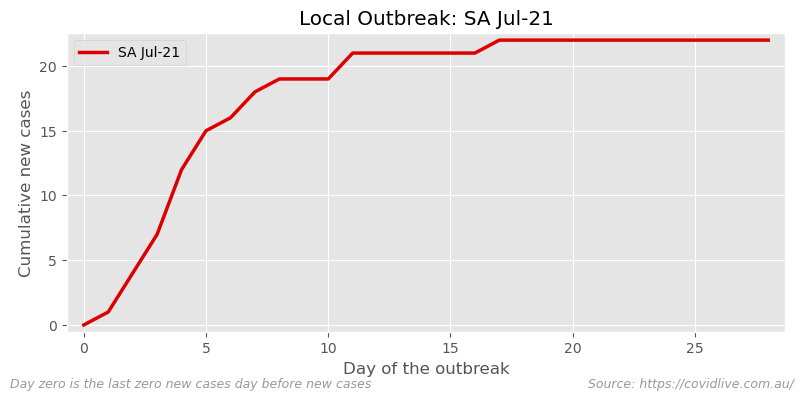

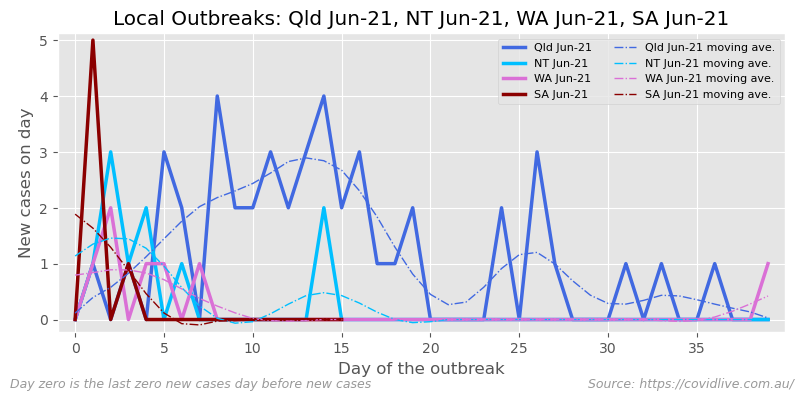

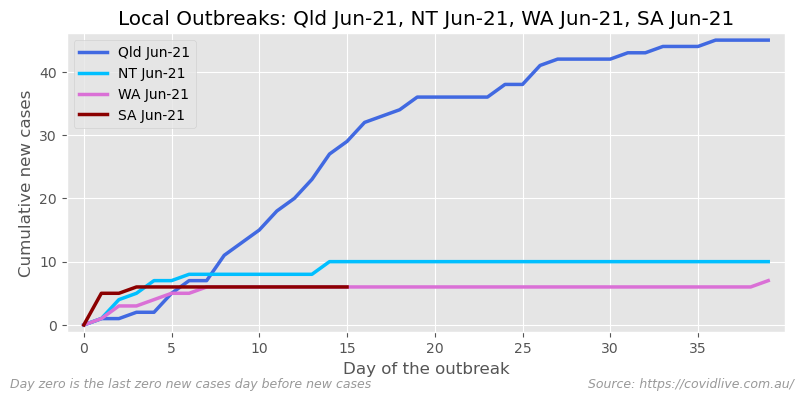

In [33]:
nsw = {
    'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
}

vic = {
    'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],    
}

qld = {
    'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ],     
}

sa = {
    'SA Jul-21':   ["SA",         '2021-07-18',  None, ],
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],

}

plot_outbreaks(nsw, colours, span_days=100)
plot_outbreaks(vic, colours, span_days=100)
plot_outbreaks(qld, colours, span_days=100)
plot_outbreaks(sa, colours[2:], span_days=100)
plot_outbreaks(older, colours[3:], span_days=100)


### Historic Outbreaks
*  After (i.e. ignoring) the first wave in March/April 2020
*  Wave larger than 100 cases in total

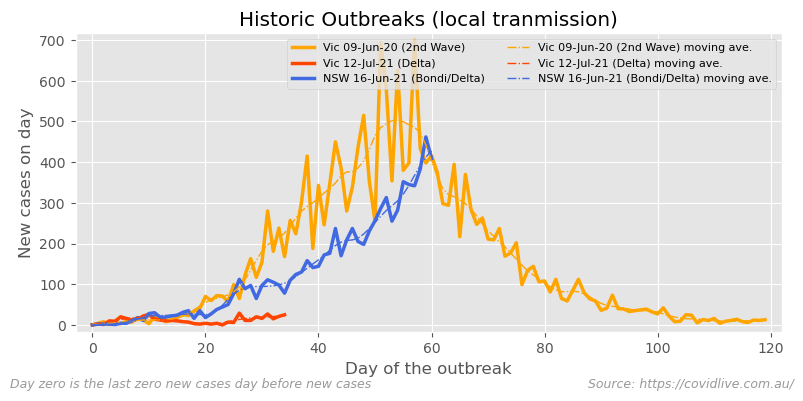

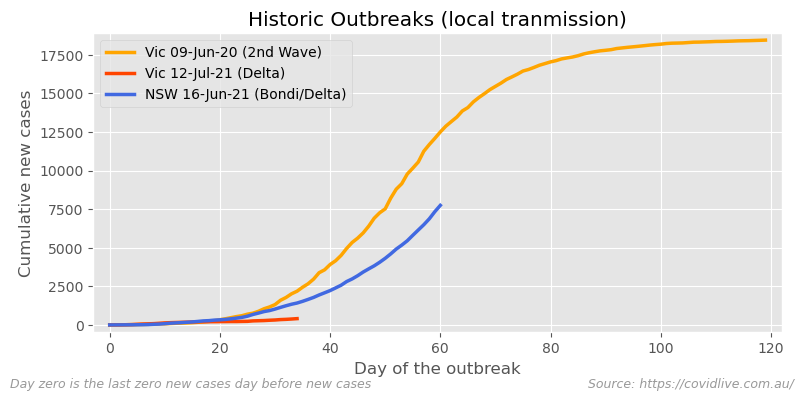

In [34]:
historic = {
    #'NSW 08-Jul-20 (Crossroads)':    ['NSW',      '2020-07-08', 120],
    #'NSW 16-Dec-20 (Avalon)':        ['NSW',      '2020-12-16', 120],
    'Vic 09-Jun-20 (2nd Wave)':      ['Victoria', '2020-06-09', 120],
    #'Vic 24-May-21 (Wollert)':       ['Victoria', '2021-05-24', 36],
    'Vic 12-Jul-21 (Delta)':         ['Victoria', '2021-07-12',  None, ],
    'NSW 16-Jun-21 (Bondi/Delta)':   ['NSW',      '2021-06-16', None],
}
colors = ['orange', 'orangered', 'royalblue',]
MAXIMUM = 121

plot_outbreaks(historic, colors, span_days=MAXIMUM, 
               title='Historic Outbreaks (local tranmission)')

### Outbreak Growth Factors

Check Vic Jun-20 (2nd Wave) starting point: [0. 4.]
Vic Jun-20 (2nd Wave)5


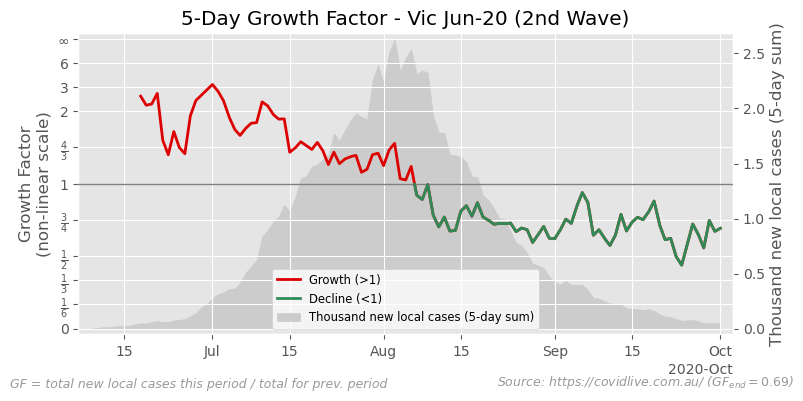

Vic Jun-20 (2nd Wave)7


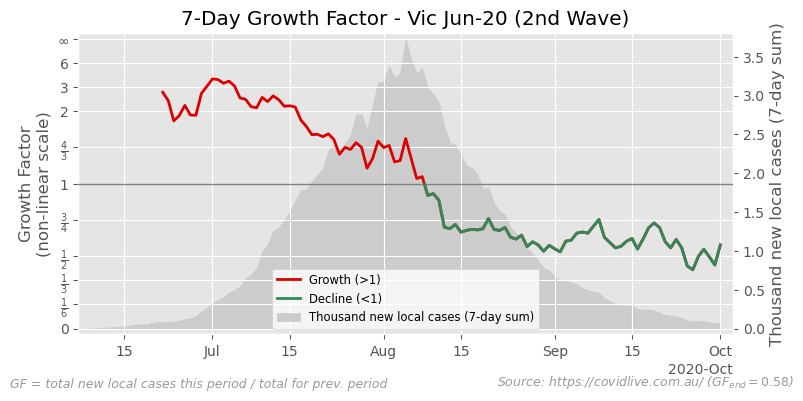

Check NSW Jun-21 (Delta-Bondi) starting point: [0. 2.]
NSW Jun-21 (Delta-Bondi)5


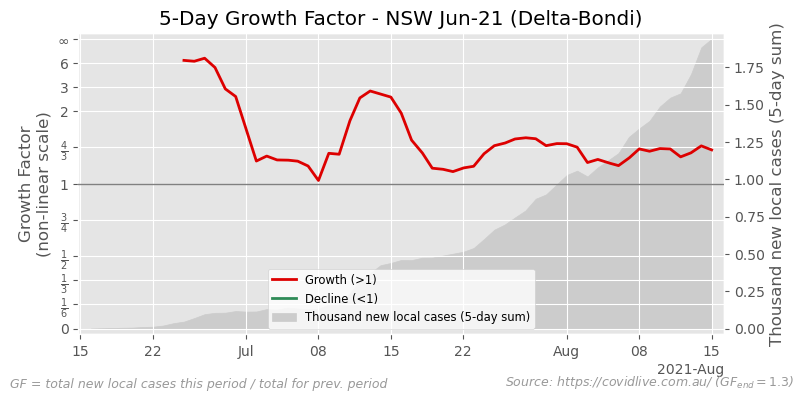

NSW Jun-21 (Delta-Bondi)7


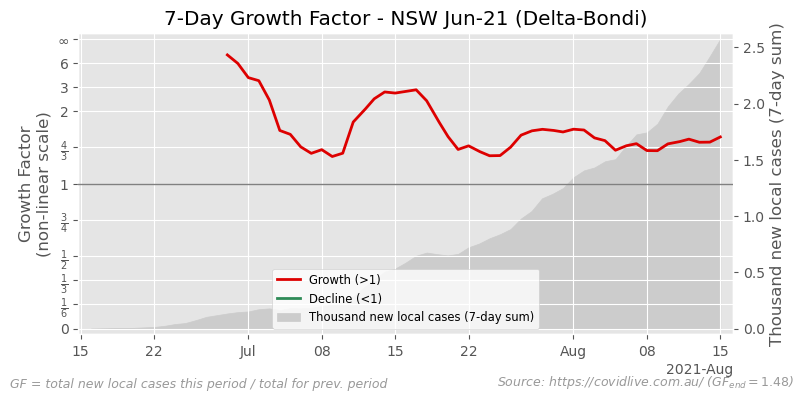

Check Vic Jul-21 (Delta) starting point: [0. 3.]
Vic Jul-21 (Delta)5


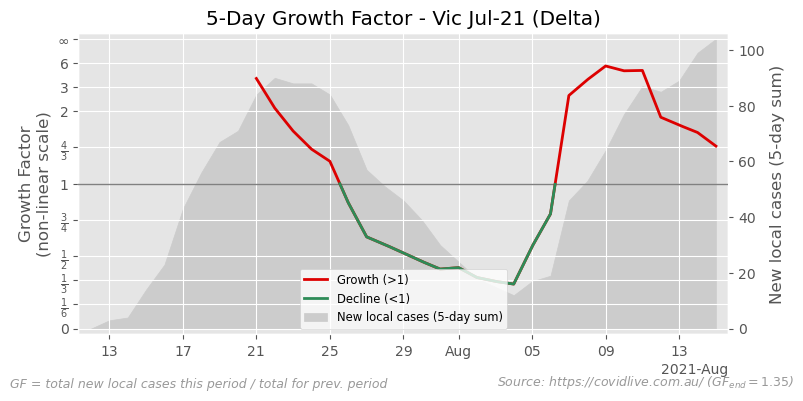

Vic Jul-21 (Delta)7


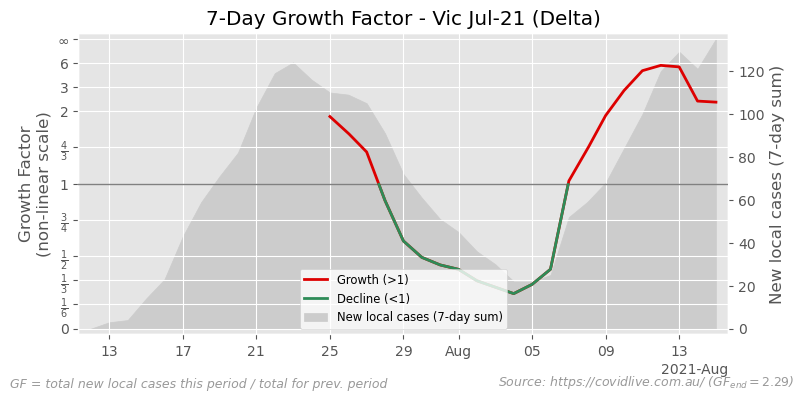

Check Qld Jul-21 starting point: [0. 1.]
Qld Jul-215


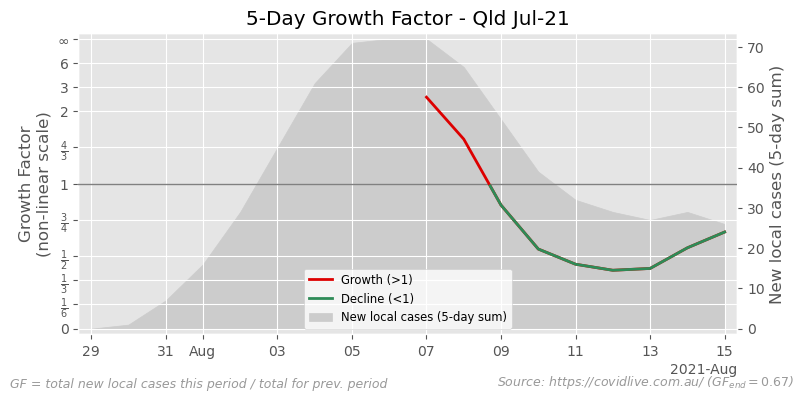

Qld Jul-217


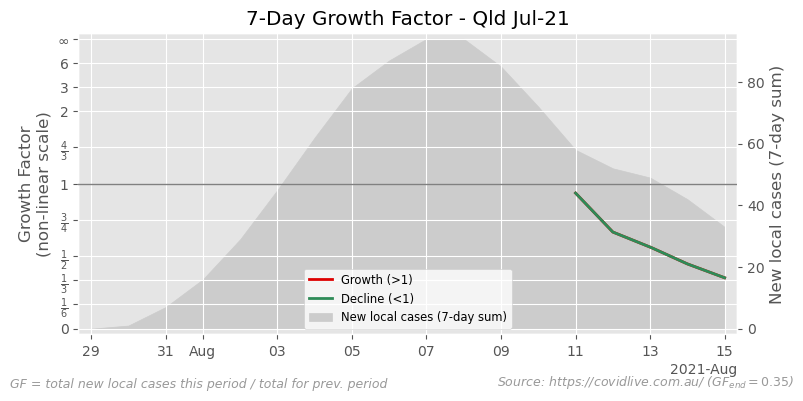

In [35]:
states = {
    # name                        state         start         length
    'Vic Jun-20 (2nd Wave)':     ('Victoria', '2020-06-09', '2020-10-01'),
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-16',  None, ],
    'Vic Jul-21 (Delta)':        ['Victoria',   '2021-07-12',  None, ],
    'Qld Jul-21':                ['Queensland', '2021-07-29',  None, ],    
}

gf = {}
for name, (state, start, length) in states.items():
    s = daily_c[LOCAL][state]
    s = s[s.index >= pd.Timestamp(start)]
    if length:
        s = s[s.index <= pd.Timestamp(length)]
    print(f'Check {name} starting point: {s[:2].values}')
    
    for period in [5, 7]:

        index = f'{name}{period}'
        print(index)
        gf[index] = ps.plot_growth_factor(
            s,
            period=period,
            mode = 'new local cases',
            title=f'{period}-Day Growth Factor - {name}', 
            chart_directory=f"{CHART_DIRECTORY}",
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
        )

### Model for the effective reproduction number $R_e$

The SIR compartmental model in discrete terms can be expressed as:

$$\begin{align}
S_t & = S_{t-1} − \beta_t I_{t−1} \frac{S_{t−1}}{N} \\
I_t & = I_{t−1} + \beta_t I_{t−1} \frac{S_{t−1}}{N} − \gamma I_{t−1} \\
R_t & = R_{t−1} + \gamma I_{t−1} \\
\end{align}$$

Where:
*   $\beta_t$ = $R_e$ / infectious period
*   $\gamma$ = 1 / infectious period

The middle line of this set of equations shows that the number infectious on day t is the number infectious on the previous day, plus the newly infectious on day t, minus those who are no longer infectious on day t.

We can take the middle element, assume that S/N is one, and derive the effective reproduction number ($R_e$), based on the following identity:

$$
R_e = \frac{newly\ infectious_t}{infectious\ cohort_{t-1}} * infectious\ period
$$

We will smooth the daily infections data in order to manage noise.

We are assuming the average infectiousness period is 7 days. 

In [36]:
def model_effective_reproduction(newly_infectious_on_day, 
                                 infectious_period=7):

    IGNORE_INITIAL = 7 # days - early outbreaks are noisy
    SMOOTH_TERM = 13
    
    # smooth infections data
    newly_infectious_on_day = Henderson.Henderson(newly_infectious_on_day, 
                                                  SMOOTH_TERM)
    
    infectious_cohort = (
        newly_infectious_on_day
        .rolling(infectious_period, min_periods=1)
        .sum()
        .shift(1)
        .dropna()
    )
    
    R_e = (newly_infectious_on_day / infectious_cohort * infectious_period)
    
    #return Henderson.Henderson(R_e[IGNORE_INITIAL:], SMOOTH_TERM)
    return R_e[IGNORE_INITIAL:]

In [37]:
analysis_frame = {
    'Vic Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-10',  120],    
    'NSW Jun-21 (Delta-Bondi)':  ['NSW',        '2021-06-17',  None, ],
}

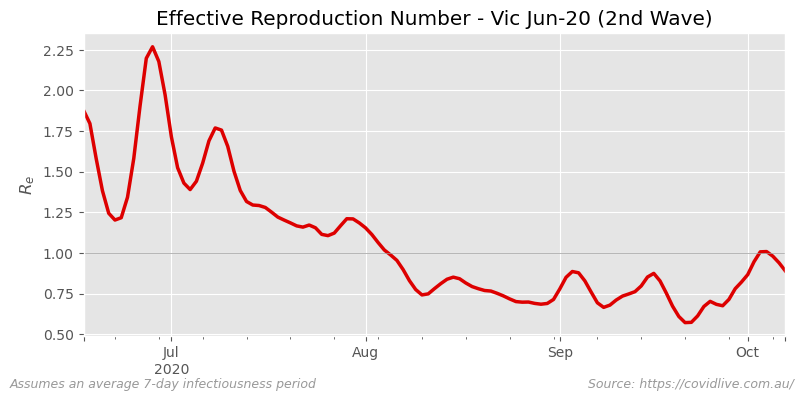

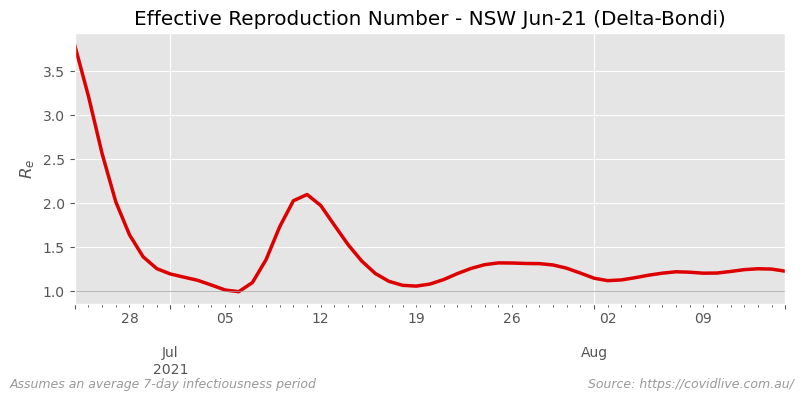

In [38]:
repo_numbers = {}
for name, (state, start, length) in analysis_frame.items():
    
    # calculate
    span = length if length else 120 # days
    s = daily_c[LOCAL][state]
    s = s[s.index >= pd.Timestamp(start)]
    s = s.iloc[:span]
    ip=7
    R_e = model_effective_reproduction(s, ip)
    repo_numbers[name] = R_e
    
    # plot
    ax = R_e.plot(lw=2.5, label=name)
    ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'Effective Reproduction Number - {name}',
            ylabel='$R_e$',
            xlabel=None,
            rfooter=SOURCE,
            lfooter=f'Assumes an average {ip}-day infectiousness period',
            show=True,
    )


### Comparative $R_e$ and GF

Note that the 5-day growth factor is a good proxy for the effective reproduction number (in this case). 

Note that the effective reproduction number series is more volatile. 

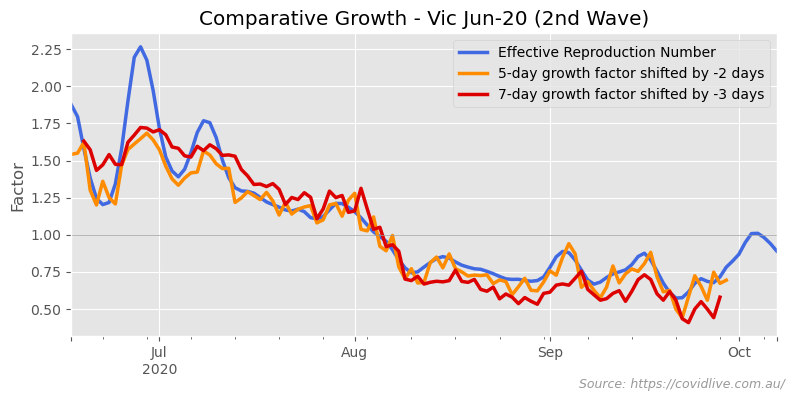

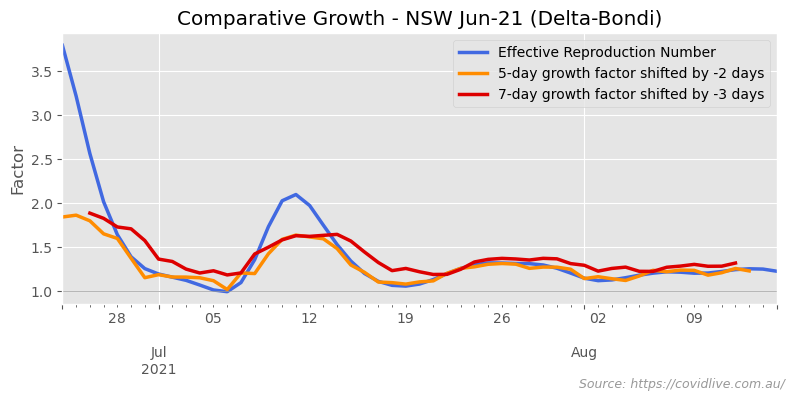

In [39]:
frames = {}
for r, s in repo_numbers.items():
    frames[r] = pd.DataFrame(s, columns=['Effective Reproduction Number'])
    
    for period in [5, 7]:
        index = f'{r}{period}'
        if index in gf:
            shift = int(-period // 2) + 1
            shifted = gf[index].resample('D').first().shift(shift)
            frames[r][f'{period}-day growth factor shifted by {shift} days'] = shifted
            
    fig, ax = plt.subplots()
    colours = ['#dd0000', 'darkorange', 'royalblue', ]
    for col in frames[r].columns:
        frames[r][col].plot(lw=2.5, c=colours.pop(), label=col, ax=ax)
    ax.axhline(y=1, lw=0.5, c='#999999')
    ax.legend(loc='best')
    ps.finalise_plot(ax,
            chart_directory=f"{CHART_DIRECTORY}",
            title=f'Comparative Growth - {r}',
            ylabel='Factor',
            xlabel=None,
            rfooter=SOURCE,
            show=True,
    )
    

### Forecast for local new case growth

In [40]:
def forecast(name, state, start, stop):
    """Construct an exponential forecast based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # forecast parameters
    outlook = 21 # forecast days
    term = 15 # days - term for henderson moving average
    period = 7 # most recent days for establishing gowth rate
    assert(period < term)
    
    # get current underlying trend
    s = daily_c[LOCAL][state].copy()
    s = s[s.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    y00 = max(s_smoothed[INDEX_CASE - (2 * period)], 0)
    y0 = max(s_smoothed[INDEX_CASE - period], 0)
    y1 = max(s_smoothed[INDEX_CASE], 0)
    if y0 == 0 or y00 == 0:
        print(f'{name}: cannot forecast from a zero base')
        return
    k1 = np.log(y1 / y0) / period
    k0 = np.log(y0 / y00) / period
    
    # create forecast
    new_s = np.arange(0, outlook)
    new_s = y1 * np.exp(new_s * k1)
    forecast = pd.Series(new_s, 
                         index=pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
    forecast = forecast.drop(forecast.index[0])

    old_s = np.arange(0, outlook)
    old_s = y0 * np.exp(old_s * k0)
    historic = pd.Series(old_s, 
                         index=pd.date_range(s.index[INDEX_CASE - period], 
                                         periods=outlook, freq='D'))
    historic = historic.drop(historic.index[0])
    print(f'Historic forecast for today: {historic[s.index[INDEX_CASE]]}')

    # plot
    forecast_label = f'Forecast $({y1:0.2f}e ^ ' + '{' + f'{k1:0.4f}t' + '})$'
    frame = pd.DataFrame([s, s_smoothed, forecast, historic], 
                      index=['New Cases', 'New Cases smoothed', 
                             forecast_label, 
                             f'Historic Forecast (as made {period} days ago)']).T
    ax = None
    lws = [2.5, 1.5, 2.5, 1.5]
    colors = ['#dd0000', 'darkorange', 'royalblue', 'dodgerblue']
    styles = ['-', '-.', '-', '-']
    plt.close('all')
    for i in range(len(frame.columns)):
        ax = frame[frame.columns[i]].plot(lw=lws[i], c=colors[i], ls=styles[i], 
                                          ax=ax, label=str(frame.columns[i]))
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=f'Outbreak Forecast for {name}',
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'Forecast based on growth over most recent {period} '
                              'days (from Henderson smoothed trend)',
                     show=True,
                    )


Historic forecast for today: 407.14590800315835


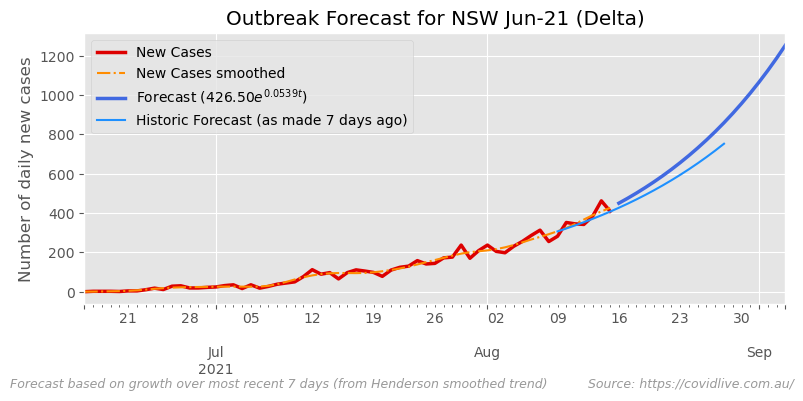

Historic forecast for today: 110.54346695931852


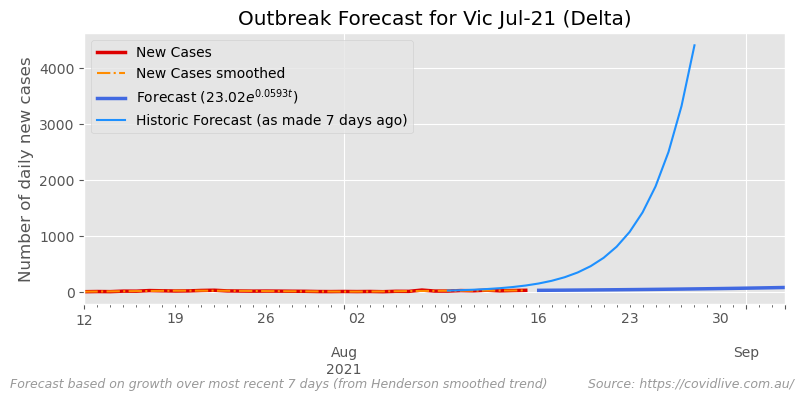

Historic forecast for today: 7.627145754879177


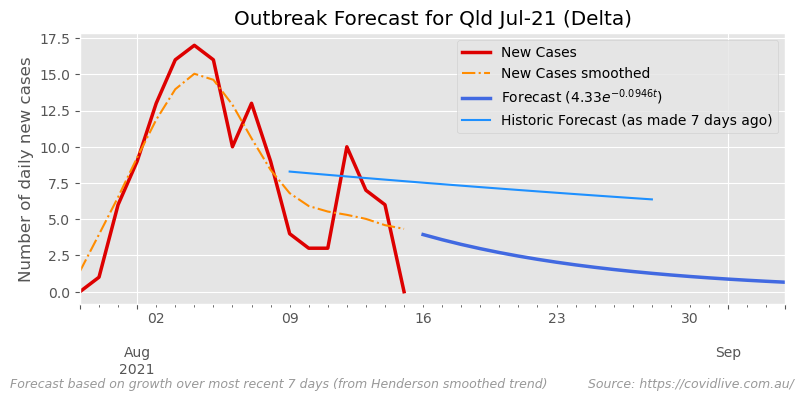

In [41]:
if True:
    
    states = {
        # name                   state         start         stop
        'NSW Jun-21 (Delta)':  ['NSW',        '2021-06-16',  None, ],
        'Vic Jul-21 (Delta)':  ['Victoria',   '2021-07-12',  None, ],
        'Qld Jul-21 (Delta)':  ['Queensland', '2021-07-29',  None, ], 

    }

    for name, (state, start, stop) in states.items():
        forecast(name, state, start, stop)


## Hospitalised

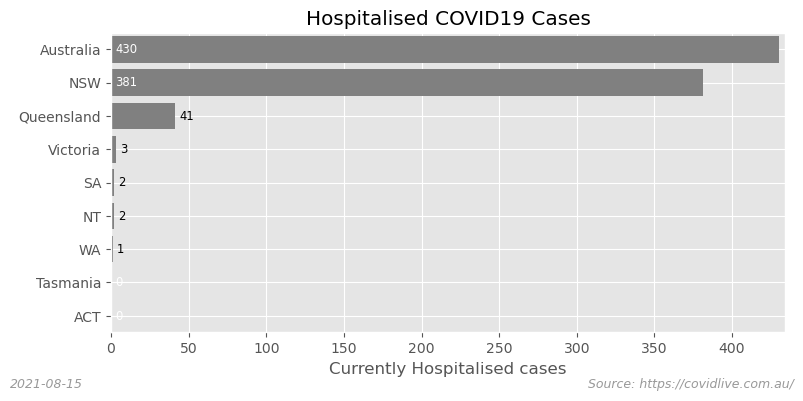

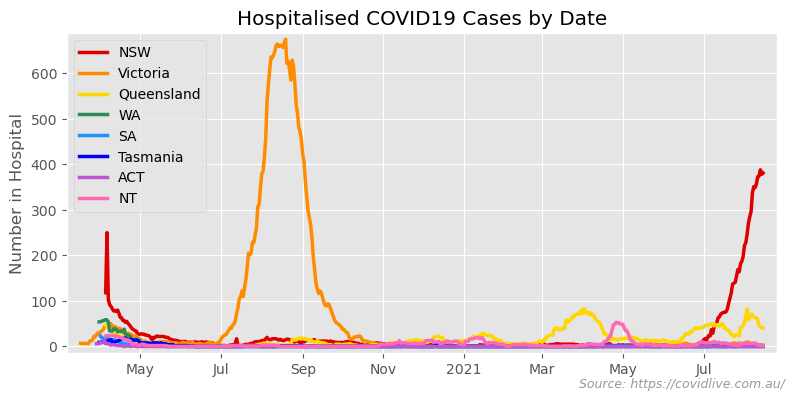

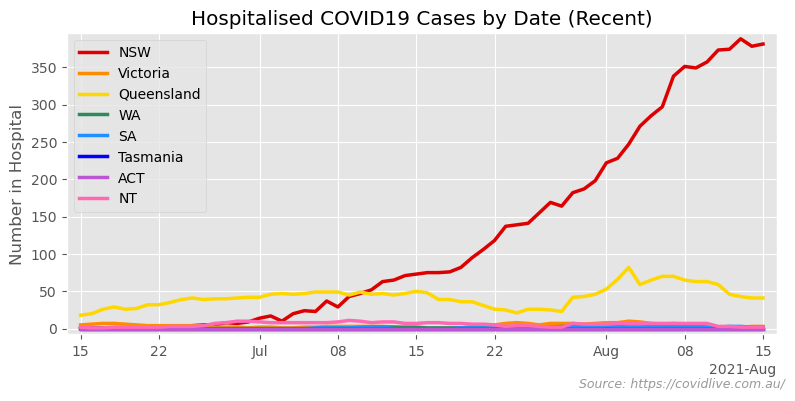

Lastest value less than its predecessor in MED_ICU_CNT for Australia, NSW


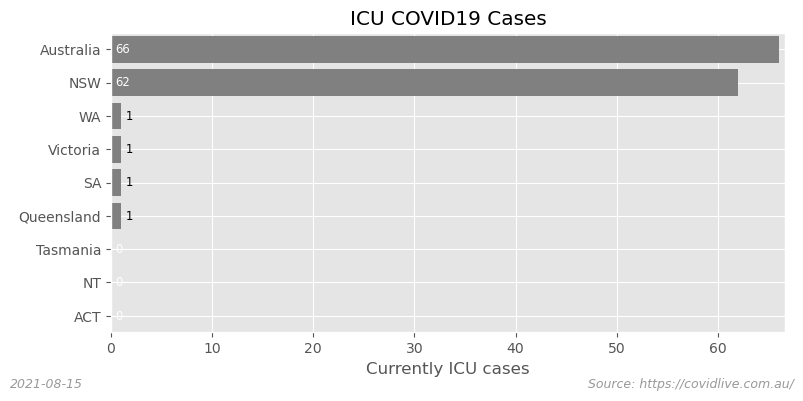

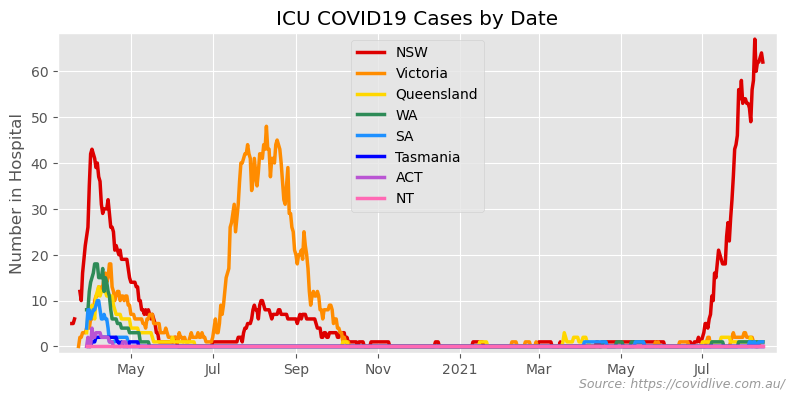

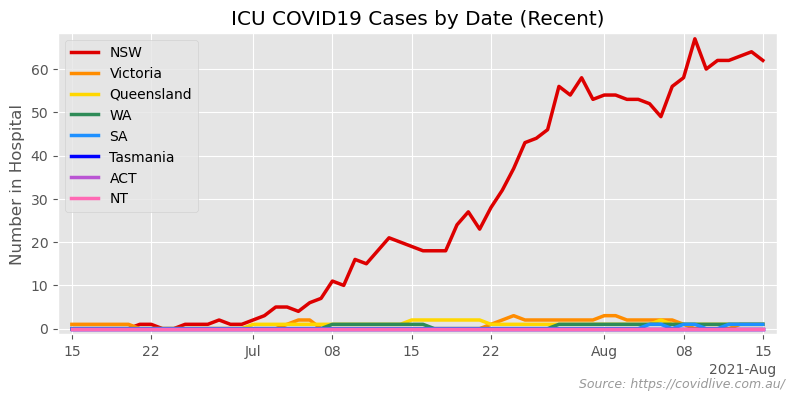

Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW


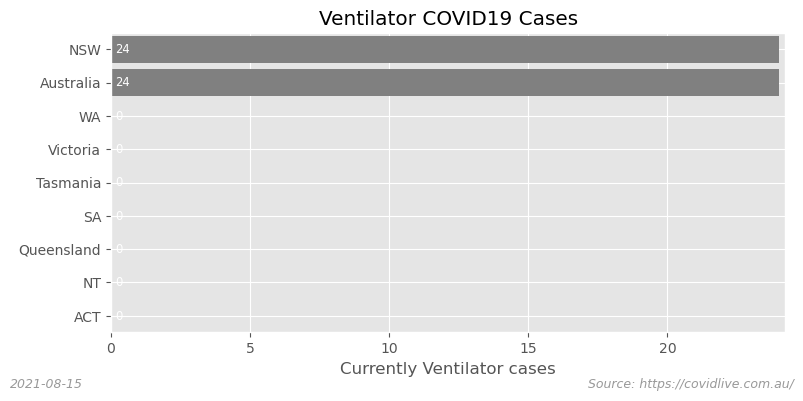

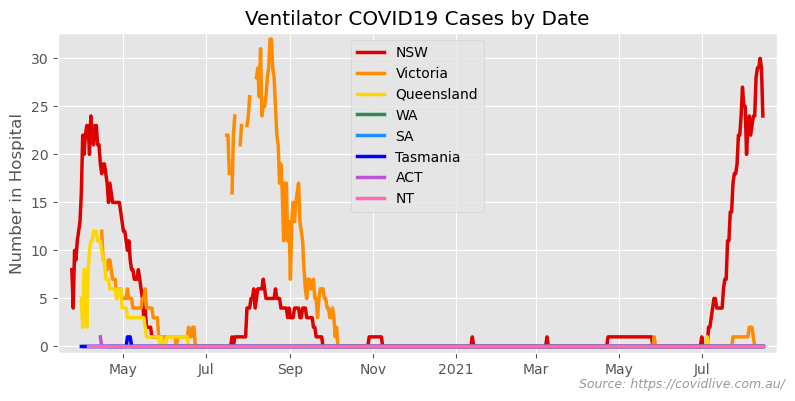

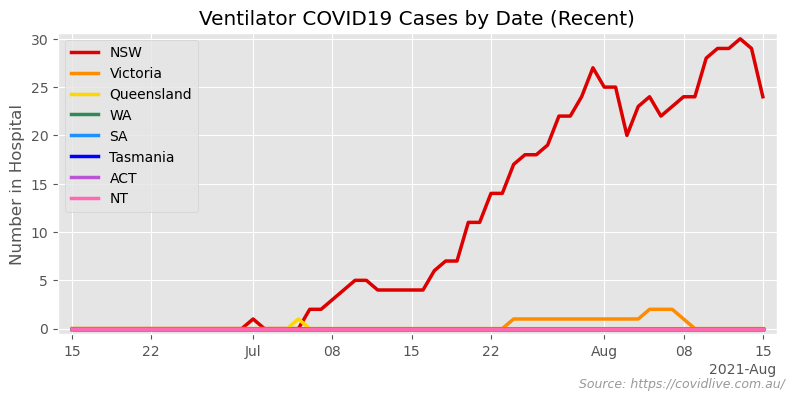

In [42]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']

for ident, desc in zip(idents, descs):

    hospital = get_pivot_table(frame_data, ident)
    hospital.index = pd.DatetimeIndex(hospital.index)
    hospital = hospital.dropna(axis=0, how='all')

    # bar chart of latest data
    latest = hospital.copy()
    if latest.iloc[-1].isna().any():
        latest.drop(latest.index[-1], inplace=True)
    row = latest.iloc[-1].astype(int)
    if row.sum() > 0:
        lfooter = str(row.name.date())
        title = f'{desc} COVID19 Cases'
        ps.plot_barh(row.sort_values(ascending=True), 
                     title=title,
                     xlabel=f'Currently {desc} cases',
                     save_as = f'{CHART_DIRECTORY}{title}.png',
                     rfooter=SOURCE,
                     lfooter=lfooter,
                     show=True,
                    )
    
    # plot hospitalised as a line chart
    for start in [0, -RECENT]:
        dataset = hospital.iloc[start:]
        if dataset.sum().sum() == 0:
            continue
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(0.02)
        for state in order:
            ax.plot(dataset.index, 
                    dataset[state], 
                    label=state, lw=2.5)
        ax.legend(loc='best')

        title = f'{desc} COVID19 Cases by Date'
        if start == -RECENT:
            title += ' (Recent)'
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=CHART_DIRECTORY,
                         xlabel=None,
                         ylabel='Number in Hospital',
                         rfooter=SOURCE,
                         show=True,
                        )

## Explore cases to deaths curve

In [43]:
def get_cases_deaths(state, start, stop):
    cases = daily_c['CASE_CNT'][state]
    cases = cases[(cases.index >= pd.Timestamp(start))
                  & (cases.index <= pd.Timestamp(stop))]
    
    deaths = daily_c['DEATH_CNT'][state]
    deaths = deaths[(deaths.index >= pd.Timestamp(start))
                  & (deaths.index <= pd.Timestamp(stop))]
    
    return cases, deaths

### Establish historical baseline

For every 23.29338327091136 identified cases there was a death


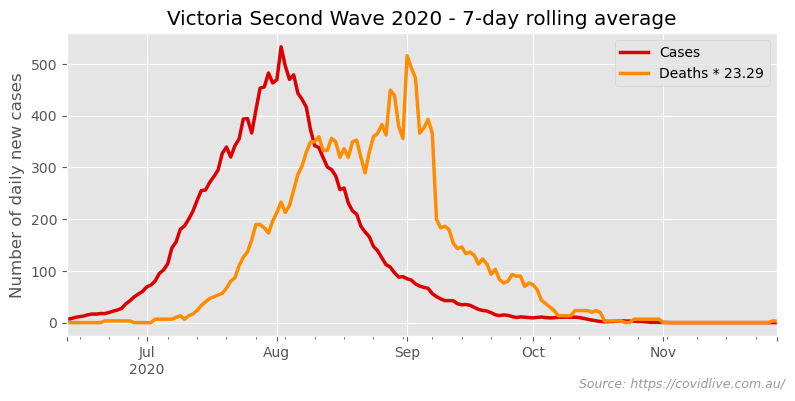

Victoria Second Wave 2020: 21 typical deviation in days from diagnosis to death


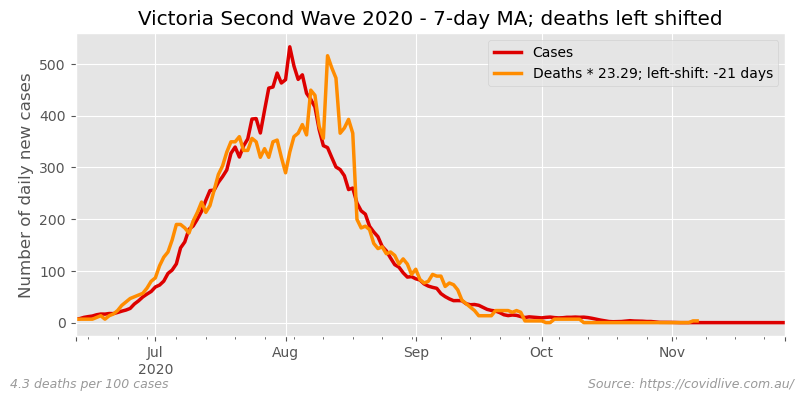

In [44]:
ROLL = 7 # days

examine = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-12-01'),
}

for title, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    factor = cases.sum() / deaths.sum()
    print(f'For every {factor} identified cases there was a death')
    
    frame = pd.DataFrame([cases.rolling(ROLL, center=True).mean(), 
                          deaths.rolling(ROLL, center=True).mean() * factor],
                         index=['Cases', f'Deaths * {factor:0.2f}']).T
    frame = frame.dropna(axis=0, how='any')
    ax = frame.plot(lw=2.5)
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day rolling average', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     show=True,
                     )
    
    max_difference = np.inf
    best = None
    for deviation in range(0, 30):
        abs_difference = (frame['Cases'] - frame[frame.columns[1]].shift(-deviation))
        abs_difference = abs_difference.abs().sum()
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
    print(f'{title}: {best} typical deviation in days from diagnosis to death')
    
    ax = pd.DataFrame([frame['Cases'], frame[frame.columns[1]].shift(-best)],
                      index=['Cases', f'Deaths * {factor:0.2f}; left-shift: {-best} days']).T.plot(lw=2.5)
    multiplier = 100
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day MA; deaths left shifted', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     show=True,
                     )


### Use above baseline to look at the recent Sydney Delta outbreak

For every 45.60 identified cases (since 2021-06-09 and up until 21 days ago) there has been a death


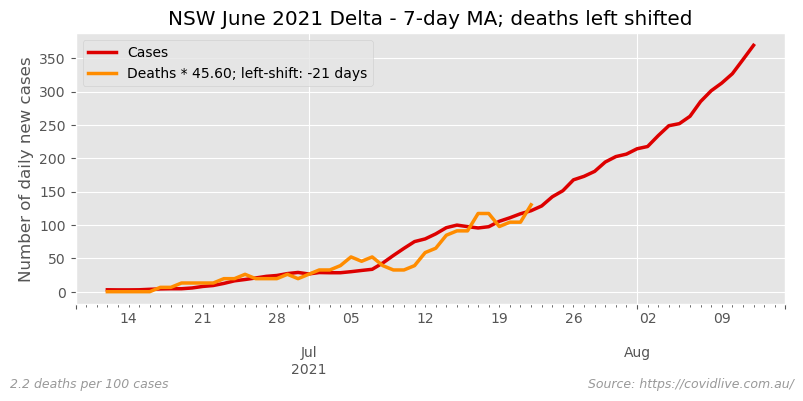

In [45]:
examine = {
        'NSW June 2021 Delta': ('NSW', '2021-06-09', '2021-12-01'),
}

for title, (state, start, stop) in examine.items():
    cases, deaths = get_cases_deaths(state, start, stop)
    factor = cases.iloc[:-best].sum() / deaths.sum()
    print(f'For every {factor:0.2f} identified cases (since {start}'
          f' and up until {best} days ago) there has been a death')

    
    ax = pd.DataFrame([cases.rolling(ROLL, center=True).mean(), 
                       (factor * deaths.shift(-best)).rolling(ROLL, center=True).mean()],
                      index=['Cases', f'Deaths * {factor:0.2f}; left-shift: {-best} days']).T.plot(lw=2.5)
    multiplier = 100
    ps.finalise_plot(ax, 
                     title=title + f' - {ROLL}-day MA; deaths left shifted', 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     rfooter=SOURCE,
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     show=True,
                     )


## The End

In [46]:
print_warnings()
print('Finished')

NOTE: 4 warnings
It looks like we are missing the latest TEST_CNT for ACT, Tasmania
Lastest value less than its predecessor in ACTIVE_CNT for Queensland, SA
Lastest value less than its predecessor in MED_ICU_CNT for Australia, NSW
Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW
Finished
